# Trabajo I. Termodinámica de una sustancia pura. 1-Hexene

# Indice

- [Introduccion](#Introduccion)
- [Joback](#Joback) 
- [Cp$_{ig}$](#Capacidad-calorifica-como-gas-ideal)
- [Lineas de equilibrio](#Lineas-de-equilibrio) 
  - [Clausius-Clapeyron](#Clausius-Clapeyron) 
  - [Antoine](#Ajuste-Antoine) 
  - [Acentrico](#Factor-acentrico)
  - [Entalpia de vaporizacion](#Entalpia-de-vaporizacion) 
- [Punto triple](#Calculo-punto-triple)
- [Diagrama de Fases](#Diagrama-de-Fases)
- [Ecuacion del Virial](#Ecuacion-del-Virial)
- [Ecuaciones cubicas de estado](#Ecuaciones-cubicas-de-estado) 
  - [Isotermas Van der walls](#Isotermas:Van-der-waals) 
  - [Isotermas Redlich-kwong](#Isotermas:-Redlich-kwong) 
  - [Isotermas Soave-Redlich kwong](#Isotermas:-Soave-Redlich-kwong) 
  - [Isotermas Peng robinson](#Isotermas:-Peng-Robinson) 
- [Propiedades Residuales](#Propiedades-Residuales) 
- [Diagrama de mollier](#Diagrama-de-mollier) 
- [Bibliografía](#Bibliografia)


 ### propiedades termodinamicas 
 CAS 592-41-6

# Joback

In [60]:
import numpy as np
from IPython.display import display, Math
import pandas as pd
# Crear un diccionario para almacenar los grupos químicos y sus valores
grupos_químicos = {}

# Lista de grupos químicos necesarios
grupos_necesarios = [
    '-CH3', '-CH2-', '>CH-', '>C<', '=CH2', '=CH-', '=C<', '=C=', '≡CH' , '≡C-', '-CH2- ring', '>CH- ring', 
    #el simbolo ≡ deberia salir con $\equiv pero no se muestra en pantalla 
    '>C< ring', '=CH- ring', '=C< ring', '-F', '-Cl', '-Br', '-I', '-0H (alcohol)', '-0H (phenol)', '-O- (nonring)',
    '-O- (ring)', '>C=O (nonring)', '>C=O (ring)', 'O=CH- (aldehyde)', '-COOH (acid)', '-COO- (ester)', '=O (except -NO2)',
    '-NH2', '>NH (nonring)', '>NH (ring)', '>N- (nonring)', '-N= (nonring)', '-N= (ring)', '=NH', '-CN', '-NO2', '-SH',
    '-S- (nonring)', '-S- (ring)'
]
#en nuestro caso es 1 grupo -CH3, 1 =CH2, 1 -CH=,3 -CH2- es decir 1,3, , ,1,1,exit
# Inicializar el contador de grupos químicos seleccionados
grupos_seleccionados = 0

# Crear un diccionario con todas las claves predeterminadas establecidas en 0
grupos_químicos = {grupo: 0 for grupo in grupos_necesarios}

# Pedir al usuario que ingrese valores para los grupos químicos
for i in range(len(grupos_necesarios)):
    grupo_quimico = grupos_necesarios[i]
    valor = input(f'Introducir cantidad de "{grupo_quimico}":, pulsar enter para que cuente como 0 o "exit" para finalizar: ')

    # Si presionas Enter sin ingresar un valor, se entenderá como 0.
    if valor == '':
        valor = 0
    elif valor.lower() == 'exit':
        # Establecer el valor del grupo químico actual en 0 y los grupos restantes en 0.
        grupos_químicos[grupo_quimico] = 0
        for j in range(i + 1, len(grupos_necesarios)):
            grupos_químicos[grupos_necesarios[j]] = 0
        break
    else:
        # Intenta convertir el valor ingresado en un número.
        try:
            valor = float(valor)
        except ValueError:
            print('Valor no válido. Intente de nuevo.')
            continue

    grupos_químicos[grupo_quimico] = valor
    grupos_seleccionados += 1

print("grupos que contribuyen:")
for grupo, valor in grupos_químicos.items():
    if valor > 0:
        print(f'{grupo}: {valor}')

# vectores Joback (los vectores no han sido modificados)
Tc = np.array([0.0141, 0.0189, 0.0164, 0.0067, 0.0113, 0.0129, 0.0117, 0.0026, 0.0027, 0.0020, 0.0100, 0.0122, 0.0042, 0.0082, 0.0143,
               0.0111, 0.0105, 0.0133, 0.0068, 0.0741, 0.0240, 0.0168, 0.0098, 0.0380, 0.0284, 0.0379, 0.0791, 0.0481,
               0.0143, 0.0243, 0.0295, 0.0130, 0.0169, 0.0255, 0.0085, None, 0.0496, 0.0437, 0.0031, 0.0119, 0.0019])
Pc = np.array([-0.0012, 0, 0.0020, 0.0043, -0.0028, -0.0006, 0.0011, 0.0028, -0.0008, 0.0016, 0.0025, 0.0004, 0.0061,
               0.0011, 0.0008, -0.0057, -0.0049,0.0057, -0.0034, 0.0112, 0.0184, 0.0015, 0.0048, 0.0031, 0.0028, 0.0030, 
               0.0077, 0.0005, 0.0101, 0.0109, 0.0077, 0.0114, 0.0074, -0.0099, 0.0076, None, -0.0101, 0.0064, 0.0084, 0.0049, 0.0051])
Vc = np.array([65, 56, 41, 27, 56, 46, 38, 36, 46, 37, 48, 38, 27, 41, 32, 27, 58, 71, 97, 28, -25, 18, 13, 62, 55, 82, 89, 82, 36, 38, 35, 29, 9, None,
               34, None, 91, 91, 63, 54, 38])
Tb = np.array([23.58, 22.88, 21.74, 18.25, 18.18, 24.96, 24.14, 26.15, 9.20, 27.38, 27.15, 21.78, 21.32, 
               26.73, 31.01, -0.03, 38.13, 66.86, 93.84, 92.88,
               76.34, 22.42, 31.22, 76.75, 94.97, 72.24, 169.09, 81.10, -10.50, 73.23, 50.17, 52.82, 11.74,
               74.60, 57.55, 83.08, 125.66, 152.54, 63.56,
               68.78, 52.10])
Tf = np.array([-5.10, 11.27, 12.64, 46.43, -4.32, 8.73, 11.14, 17.78, -11.18, 64.32, 7.75, 19.88, 60.15, 8.13, 37.02,
               -15.78, 13.55, 43.43, 41.69, 44.45,
               82.83, 22.23, 23.05, 61.20, 75.97, 36.90, 155.50, 53.60, 2.08, 66.89, 52.66, 101.51, 48.84, None,
               68.40, 68.91, 59.89, 127.24, 20.09, 34.40, 79.93])
AHF = np.array([-76.45, -20.64, 29.89, 82.23, -9.63, 37.97, 83.99, 142.14, 79.30, 115.51, -26.80, 8.67, 79.72, 2.09, 
                46.43, -251.92, -71.55, -29.48, 21.06, -208.04,
                -221.65, -132.22, -138.16, -133.22, -164.50, -162.03, -426.72, -337.92, -247.61, -22.02, 53.47, 31.65, 
                123.34, 23.61, 55.52, 93.70, 88.43, -66.57,
                -17.33, 41.87, 39.10])
AGF = np.array([-43.96, 8.42, 58.36, 116.02, 3.77, 48.53, 92.36, 136.70, 77.71, 109.82, -3.68, 40.99, 87.88, 11.30, 
                54.05, -247.19, -64.31, -38.06, 5.74, -189.20, 
                -197.37, -105.00, -98.22, -120.50, -126.27, -143.48, -387.87, -301.95, -250.83, 14.07, 89.39, 
                75.61, 163.16, None, 79.93, 119.66, 89.22, -16.83,
                -22.99, 33.12, 27.76])
IGCa = np.array([1.95E1, -9.09E-1, -2.30E+1, -6.62E+1, 2.36E+1, -8.00, -2.81E1, 2.74E1, 2.45E1, 7.87, -6.03,
                 -2.05E+1, -9.09E+1, -2.14, -8.25, 2.65E+1, 3.33E+1,
                 2.86E+1, 3.21E1, 2.57E+1, -2.81, 2.55E+1, 1.22E+1, 6.45, 3.04E+1, 3.09E+1, 2.41E+1, 2.45E+1,
                 6.82, 2.69E+1, -1.21, 1.18E+1, -3.11E+1, None, 
                 8.83, 5.69, 3.65E+1, 2.59E+1, 3.53E+1, 1.96E+1, 1.67E+1])
IGCb = np.array([-8.08E-3, 9.50E-2, 2.04E-1, 4.27E-1, -3.81E-2, 1.05E-1, 2.08E-1, -5.57E-2, -2.71E-2, 2.01E-2, 
                 8.54E-2, 1.62E-1, 5.57E-1, 5.74E-2, 1.01E-1, -9.13E-2,
                 -9.63E-2, -6.49E-2, -6.41E-2, -6.91E-2, 1.11E-1, -6.32E-2, -1.26E-2, 6.70E-2, -8.29E-2, -3.36E-2, 
                 4.27E-2, 4.02E-2, 1.96E-2, 4.12E-2, 7.62E-2,
                 -2.30E-2, 2.27E-1, None, -3.84E-3, -4.12E-3, -7.33E-2, -3.74E-3, -7.58E-2, -5.61E-3, 4.81E-3])
IGCc = np.array([1.53E-4, -5.44E-5, -2.65E-4, -6.41E-4, 1.72E-4, -9.63E-5, -3.06E-4, 1.01E-4, 1.11E-4, -8.33E-6,
                 -8.00E-6, -1.6E-4, -9.00E-4, -1.64E-6, -1.42E-4, 
                 1.91E-4, 1.87E-4, 1.36E-4, 1.26E-4, 1.77E-4, -1.16E-4, 1.11E-4, 6.03E-5, -3.57E-5, 2.36E-4, 1.60E-4,
                 8.04E-5, 4.02E-5, 1.27E-5, 1.64E-4, -4.86E-5,
                 1.07E-4, -3.20E-4, None, 4.35E-5, 1.28E-4, 1.84E-46, 1.29E-4, 1.85E-4, 4.02E-5, 2.77E-5])
IGCd = np.array([-9.67E-8, 1.19E-8, 1.20E-7, 3.01E-7, -1.03E-7, 3.56E-8, 1.46E-7, -5.02E-8, -6.78E-8, 1.39E-9, -1.80E-8,
                 6.24E-8, 3.06E-7, 2.24E-9, 2.39E-8, -3.44E-8,
                 -5.10E-8, -3.38E-8, -2.94E-8, -4.53E-8, -1.12E-7, -3.18E-8, -6.94E-9, 2.68E-8, -4.20E-8, -1.19E-8,
                 -1.21E-8, 3.92E-9, -2.02E-8, -5.90E-8, -5.88E-9,
                 4.80E-8, -3.60E-7, None, 8.22E-9, 7.04E-9, -5.48E-8, 6.10E-9, -7.19E-8, 8.04E-9, -1.24E-8])
AHV=np.array([2.373,2.226,1.691,0.636,1.724,2.205,2.138,2.661,1.155,3.302,2.398,1.942,0.644,2.544,3.059,-0.670,4.532,
              6.582,9.520,16.826,12.499,2.410,4.682,8.972,
              6.645,9.093,19.537,9.633,5.909,10.788,6.436,6.930,1.896,3.335,6.528,12.169,12.851,16.738,6.884,6.817,5.984])
AHfl=np.array([0.908,2.590,0.749,-1.460,-0.473,2.691,3.063,4.720,2.322,4.151,0.490,3.243,-1.373,1.101,2.394,1.398,2.515,
               3.603,2.724,2.406,4.490,1.188,5.879,4.189,
               None,3.197,11.051,6.959,3.624,3.515,5.009,7.490,4.703,None,3.649,None,2.414,9.679,2.360,4.130,1.557])
na=np.array([548.29,94.16,-322.15,-573.56,495.01,82.28,None,None,None,None,307.53,-394.29,None,259.65,-245.74,None,625.45,
             738.91,809.55,2173.72,3018.17,122.09,
             440.24,340.35,None,740.92,1317.23,483.88,675.24,None,None,None,None,None,None,None,None,None,None,None,None])
nb=np.array([-1.719,-0.199,1.187,2.307,-1.539,-0.242,None,None,None,None,-0.798,1.251,None,-0.702,0.912,None,-1.814,-2.038,
             -2.224,-5.057,-7.314,-0.386,-0.953,
             -0.350,None,-1.713,-2.578,-0.966,-1.340,None,None,None,None,None,None,None,None,None,None,None,None])
NA = np.array([4,3,2,1,3,2,1,1,2,1,3,2,1,2,1,1,1,1,1,2,2,1,1,2,2,3,4,3,1,3,2,2,1,1,1,2,2,3,2,1,1]) #Numero de atomos
MW=np.array([15.03461,14.02664,13.01867,12.0107,14.02664,13.01867,12.0107,12.0107,13.01867,12.0107,14.02664,13.01867,12.0107,
             13.01867,12.0107,18.9984032,35.453,
             79.909,126.90447,17.00737,17.00737,15.9994,15.9994,28.0101,28.0101,29.01807,45.01747,44.0095,15.9994,16.02294,
             15.01497,15.01497,14.007,14.007,14.007,
             15.01497,26.0177,46.0058,33.07297,32.065,32.065]) #masas moleculares
# Crear una función para reemplazar None por 0.00 en un vector
def replace_none_with_zero(vector):
    return np.array([0.00 if x is None else x for x in vector])

# Reemplazar None en todos los vectores
Tc = replace_none_with_zero(Tc)
Pc = replace_none_with_zero(Pc)
Vc = replace_none_with_zero(Vc)
Tb = replace_none_with_zero(Tb)
Tf = replace_none_with_zero(Tf)
AHF = replace_none_with_zero(AHF)
AGF = replace_none_with_zero(AGF)
IGCa = replace_none_with_zero(IGCa)
IGCb = replace_none_with_zero(IGCb)
IGCc = replace_none_with_zero(IGCc)
IGCd = replace_none_with_zero(IGCd)
AHV = replace_none_with_zero(AHV)
AHfl = replace_none_with_zero(AHfl)
na = replace_none_with_zero(na)
nb = replace_none_with_zero(nb)

# Crear un diccionario con las propiedades y sus valores
suma_contribuciones = {
    '$\mathrm{T_b}$ (K)': 198.2 + np.sum(Tb * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios])),
    '$\mathrm{T_c}$ (K)': (198.2 + np.sum(Tb * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios]))) * 
    ((0.584 + (0.965 * np.sum(Tc * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios]))) - 
      (np.sum(Tc * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios])))**2))**(-1), 
    '$\mathrm{P_c}$ (bar)': (0.113 + (0.0032 * np.sum(NA* np.array([grupos_químicos[grupo] for grupo in grupos_necesarios]))) -
                             (np.sum(Pc * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios]))))**(-2), #error
    '$\mathrm{V_c}$ $\mathrm{(cm^3/mol)}$': np.sum(Vc * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios])) + 17.5,
    '$\mathrm{T_f}$ (K)': 122.5 + np.sum(Tf * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios])),
    'ΔH$\mathrm{_{f,298}^°}$ (KJ/mol)': 68.29 + np.sum(AHF * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios])),
    'ΔG$\mathrm{_{f,298}^°}$ (KJ/mol)': 53.88 + np.sum(AGF * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios])),
    'ΔH$\mathrm{_{v,b}}$ (KJ/mol)': 15.3 + np.sum(AHV * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios])),
    'ΔH$\mathrm{_f}$ (KJ/mol)': 0.88 + np.sum(AHfl * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios])),
    'IGCa': -37.93 + np.sum(IGCa * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios])),
    'IGCb': 0.210 + np.sum(IGCb * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios])),
    'IGCc': -3.91e-4 + np.sum(IGCc * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios])),
    'IGCd': 2.06e-7 + np.sum(IGCd * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios])),
    'η$\mathrm{_a }$ ($ \mathrm{ N \cdot s/m^2}$)': np.sum(na * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios])),
    'η$\mathrm{_b} $ ($\mathrm{ N s/m^2}$)': np.sum(nb * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios])),
}
# Crear un DataFrame de una fila con los valores de las propiedades
df_suma_contribuciones = pd.DataFrame([suma_contribuciones])
#calcular columna de Zc en el dataframe
dataframe2=(df_suma_contribuciones.iloc[:, 2] * 1e5 * df_suma_contribuciones.iloc[:, 3]) / (df_suma_contribuciones.iloc[:, 1] * 8.314*1e6)
dataframe2 = dataframe2.rename('Zc')
#calcular columna de  en el dataframe
Densidad_critica=np.sum(MW * np.array([grupos_químicos[grupo] for grupo in grupos_necesarios]))/(df_suma_contribuciones.iloc[:, 3])                                                                            
Densidad_critica = dataframe2.rename('$ρ_c$ (kg/m³)')
# # Concatenar tabla joback y zc
# df4 = pd.concat([df_suma_contribuciones, dataframe2], axis=1) 

# # Concatenar tabla anterior con tabla de densidad critica
# df3 = pd.concat([df4, Densidad_critica], axis=1) 

# # Redondear todas las columnas (excepto 'IGCc' y 'IGCd') a 3 decimales
# columnas_redondear = df3.columns.difference(['IGCc', 'IGCd'])
# df3[columnas_redondear] = df3[columnas_redondear].round(3)

# # Aplicar formato científico a las columnas 'IGCc' y 'IGCd' en el estilo
# df3.style.format({'IGCc': '{:e}', 'IGCd': '{:e}'}).hide(axis="index")


# Concatenar tabla joback y zc
df4 = pd.concat([df_suma_contribuciones, dataframe2], axis=1) 

# Concatenar tabla anterior con tabla de densidad crítica
df3 = pd.concat([df4, Densidad_critica], axis=1) 

# Redondear todas las columnas (excepto 'IGCc' y 'IGCd') a 3 decimales
columnas_redondear = df3.columns.difference(['IGCc', 'IGCd'])
df3[columnas_redondear] = df3[columnas_redondear].round(3)

# Formatear 'IGCc' y 'IGCd' a notación científica
df3['IGCc'] = df3['IGCc'].apply(lambda x: "{:e}".format(x))
df3['IGCd'] = df3['IGCd'].apply(lambda x: "{:e}".format(x))

# Establecer la opción de visualización para mostrar solo 3 decimales
pd.set_option('display.float_format', '{:.3f}'.format)

# Mostrar el DataFrame
df3
#en nuestro caso es 1 grupo -CH3, 1 =CH2, 1 -CH=,3 -CH2- es decir 1,3, , ,1,1,exit# Concatenar tabla joback y zc

Introducir cantidad de "-CH3":, pulsar enter para que cuente como 0 o "exit" para finalizar:  1
Introducir cantidad de "-CH2-":, pulsar enter para que cuente como 0 o "exit" para finalizar:  3
Introducir cantidad de ">CH-":, pulsar enter para que cuente como 0 o "exit" para finalizar:  
Introducir cantidad de ">C<":, pulsar enter para que cuente como 0 o "exit" para finalizar:  
Introducir cantidad de "=CH2":, pulsar enter para que cuente como 0 o "exit" para finalizar:  1
Introducir cantidad de "=CH-":, pulsar enter para que cuente como 0 o "exit" para finalizar:  1
Introducir cantidad de "=C<":, pulsar enter para que cuente como 0 o "exit" para finalizar:  exit


grupos que contribuyen:
-CH3: 1.0
-CH2-: 3.0
=CH2: 1.0
=CH-: 1.0


,$\mathrm{T_b}$ (K),$\mathrm{T_c}$ (K),$\mathrm{P_c}$ (bar),$\mathrm{V_c}$ $\mathrm{(cm^3/mol)}$,$\mathrm{T_f}$ (K),"ΔH$\mathrm{_{f,298}^°}$ (KJ/mol)","ΔG$\mathrm{_{f,298}^°}$ (KJ/mol)","ΔH$\mathrm{_{v,b}}$ (KJ/mol)",ΔH$\mathrm{_f}$ (KJ/mol),IGCa,IGCb,IGCc,IGCd,η$\mathrm{_a }$ ($ \mathrm{ N \cdot s/m^2}$),η$\mathrm{_b} $ ($\mathrm{ N s/m^2}$),Zc,$ρ_c$ (kg/m³)
0,333.560,500.353,32.579,352.500,155.620,-41.740,87.480,28.280,11.776,-5.557,0.554,-3.255000e-04,7.760000e-08,1408.060,-4.097,0.276,0.276


In [3]:
import pandas as pd
import numpy as np
from IPython.display import display, Math
# Configurar el formato de números para todas las columnas antes de crear el DataFrame
pd.options.display.float_format = '{:.2f}'.format

data = {
    'Fuente': ['NIST', 'Chemeo', 'CRC', 'PGL'],
    'Δf H° liquid (kJ/mol)': [-73.3, -73.14, -74.2, None],
    'ΔH$\mathrm{_{f,298}^°}$ (KJ/mol)': [-42.2, -42.43, -43.5,-41.95 ],
    'S° liquid (J/(mol·K))': [295.18, 295.18,  295.2, None],
    '$\mathrm{T_c}$ (K)': [504.0, 504.0, 504.0, 504.00],
    'Pc $\\times$1E-06(Pa)': [3.21, 3.21,3.21, 3.143],
    '$ρ_c$ (kg/m³)': [237.33, 237.33, None, None],
    '$\mathrm{T_b}$ (K)': [337.2, 337.09, 336.63, 336.63], 
    '$\mathrm{T_f}$ (K)': [133.4, 133.42, 133.39, 133.34],
    '$\mathrm{V_c}$ $\mathrm{(cm^3/mol)}$': [355.1, 355,355.1 ,355.1],
    'Zc': [None, 0.272, 0.265, 0.266],
    ' $\omega$': [None, 0.2850, 0.280, 0.281],
}

df = pd.DataFrame(data)

# Calcular la media de todas las columnas y el argumento asegura que solo se hagan en las columnas numéricas
media = df.mean(numeric_only=True)
# Se establece el valor de la columna 'Fuente' en el objeto media en 'Media'. Esto crea una columna de media que se utilizará para representar las medias en el DataFrame resultante.
media['Fuente'] = 'Media'

# El objeto media se convierte en un nuevo DataFrame llamado media_df. Luego se transpone para que sea un vector fila en lugar de un vector columna.
media_df = pd.DataFrame(media).transpose()
# Reemplazar valores None por una cadena vacía ('') en el DataFrame
df = df.replace([None, np.nan], '')
# Concatenar el DataFrame de media con el DataFrame original
df = pd.concat([df, media_df], ignore_index=True)
#crear el dataframe con la columna de de joback
df5 = df3.iloc[:, [5, 1, 2, -1, 0, 4, 3, -2]]
df5.loc[:, '$\mathrm{P_c}$ (bar)'] = df5['$\mathrm{P_c}$ (bar)'] / 10
#insertar columnas vacias 
columnas_vacias = [''] * df3.shape[0] #con shape se crea tantas filas como tenga la matriz para el valor de 0 o columnas para el valor de 1
df5.insert(0, 'Fuente', columnas_vacias) #ademas para que se pueda concatenar en panda se renombran de la misma manera 
df5.insert(1, 'Δf H° liquid (kJ/mol)', columnas_vacias)
df5.insert(3, 'S° liquid (J/(mol·K))', columnas_vacias)
df5[' $\omega$'] = columnas_vacias #columna vacia final
df5.at[0, 'Fuente'] = 'Joback'
df5.rename(columns={'$\mathrm{P_c}$ (bar)': 'Pc $\\times$1E-06(Pa)'}, inplace=True) ## con inplace nos aseguramos que se reemplaza en el mismo dataframe, se cambia el nombre para que ambos dataframe coincidan 
#unir a df para tener la columna con parametros joback
df = pd.concat([df, df5], ignore_index=True)
# df = df.style.set_table_styles([
#     {'selector': '.col7',
#      'props': [('max-width', '100px')]}])
pd.set_option('display.max_colwidth', 100) #ajustar columnas error al estar en automatica
pd.set_option('display.float_format', '{:.3f}'.format) #3 decimales aunque da algun tipo de error 
pd.options.mode.chained_assignment = None  # Desactivar todas las advertencias SettingWithCopyWarning debido a que al usar copias del dataframe3 al correr el comando no sabe si ha modificado la copia 
display(df)



,Fuente,Δf H° liquid (kJ/mol),"ΔH$\mathrm{_{f,298}^°}$ (KJ/mol)",S° liquid (J/(mol·K)),$\mathrm{T_c}$ (K),Pc $\times$1E-06(Pa),$ρ_c$ (kg/m³),$\mathrm{T_b}$ (K),$\mathrm{T_f}$ (K),$\mathrm{V_c}$ $\mathrm{(cm^3/mol)}$,Zc,$\omega$
0,NIST,-73.300,-42.200,295.180,504.000,3.210,237.330,337.200,133.400,355.100,,
1,Chemeo,-73.140,-42.430,295.180,504.000,3.210,237.330,337.090,133.420,355.000,0.272,0.285
2,CRC,-74.200,-43.500,295.200,504.000,3.210,,336.630,133.390,355.100,0.265,0.280
3,PGL,,-41.950,,504.000,3.143,,336.630,133.340,355.100,0.266,0.281
4,Media,-73.547,-42.520,295.187,504.000,3.193,237.330,336.887,133.387,355.075,0.268,0.282
5,Joback,,-41.740,,500.353,3.258,0.276,333.560,155.620,352.500,0.276,


datos de paper y bibliografia poner bien los nombres formato apa a la hora de citar 

# Capacidad calorifica como gas ideal

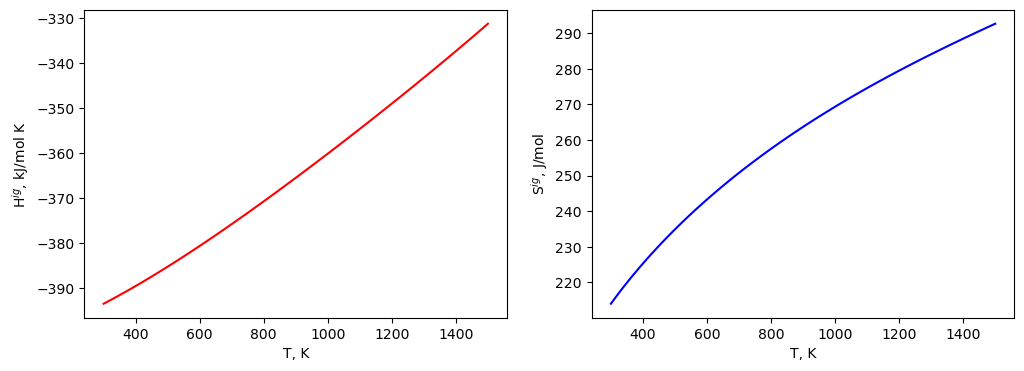

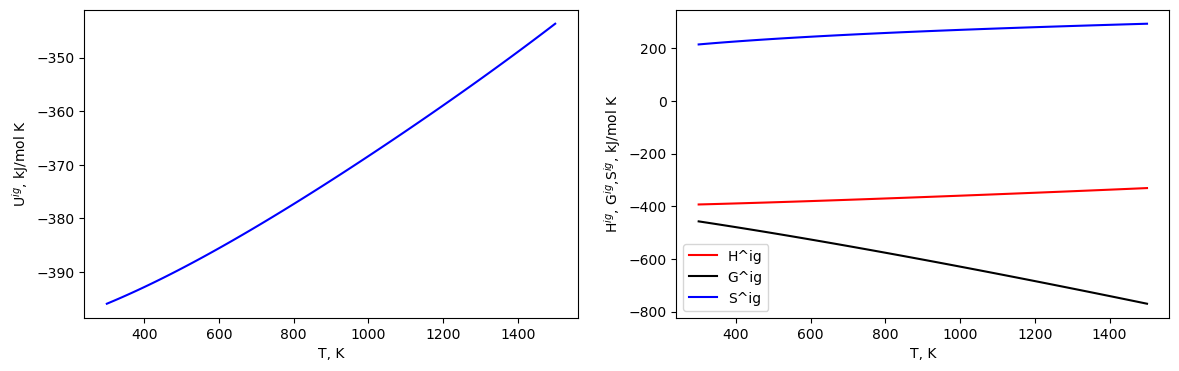

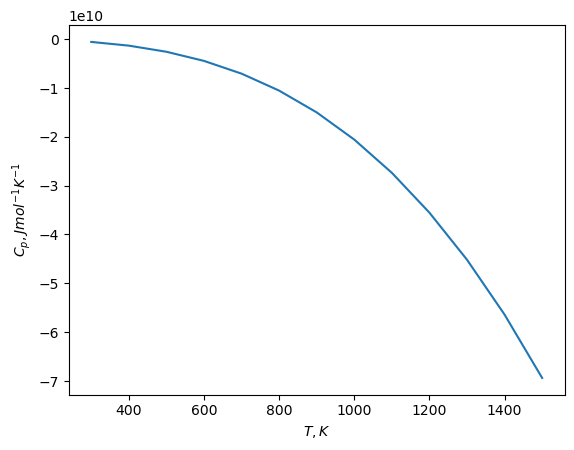

In [4]:
# Importar librerías necesarias

#usar coeficientes calculados nuevos, 

import numpy as np
import pandas as pd
# Constantes y valores de referencia
R=8.314
T_R=298.15
P_R=1e5
# condciones 
T= 298
P= 5e6 
# Datos tabulados
S0 = 213.8
DFH0 = -393.5e3
# Crear la una variable con los coeficientes en el orden que aparecen en tablas
ACP_tabla = np.array([19.8, 0.07344, -5.602e-5, 1.715e-8]) #Polinomio cp 
# Invertir para trabajar con polinomios en potencias en orden decreciente
ACP = ACP_tabla[::-1]
# Calculo entalpia
ACPi = np.polyint(ACP);
HIG = DFH0 + np.polyval(ACPi, T) - np.polyval(ACPi, T_R)
# Calculo entropia
ACPTi = np.polyint(ACP[0:-1])  # Para integrar el término independiente aparte
SIG = S0 + ACP[-1] * np.log(T/T_R) + np.polyval(ACPTi, T)-np.polyval(ACPTi, T_R)-R*np.log(P/P_R)
VIG = R*T/P
GIG = HIG-T*SIG
CPI={
'Fuente': ['Analitico'],
'ΔH$\mathrm{_{f,298}^°}$ (KJ/mol)': ['HIG'],    
'ΔS$\mathrm{_{f,298}^°}$ (J/mol)': ['SIG'], 
'V$\mathrm{_{f,298}^°}': ['VIG'],
'ΔG$\mathrm{_{f,298}^°}$ (KJ/mol)': ['GIG'],
}
CPI
import matplotlib.pyplot as plt
# Importa librería para gráficos
# Representa Hig y Sig
T = np.linspace(300,1500,num=120)
P = 100000
# Calculo entalpia
ACPi = np.polyint(ACP);
HIG = DFH0 + np.polyval(ACPi, T) - np.polyval(ACPi, T_R)
# Calculo entropia
ACPTi = np.polyint(ACP[0:-1])  # Para integrar el término independiente aparte
SIG = S0 + ACP[-1] * np.log(T/T_R) + np.polyval(ACPTi, T)-np.polyval(ACPTi, T_R)-R*np.log(P/P_R)
VIG = R*T/P
GIG = HIG-T*SIG
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(T, HIG/1000, 'r', label="H^ig")
axes[0].set_xlabel('T, K')
axes[0].set_ylabel('H$^{ig}$, kJ/mol K')
axes[1].plot(T, SIG, 'b', label="S^ig")
axes[1].set_xlabel('T, K')
axes[1].set_ylabel('S$^{ig}$, J/mol')
plt.show()

# Representa el resto de propiedades: Hig, Gig, Sig
fig2, axes2 = plt.subplots(1, 2, figsize=(14, 4))
# Figura un poco más ancha para que estén separadas
axes2[0].plot(T, (HIG-R*T)/1000,  'b', label="U$^{ig}")
axes2[0].set_xlabel('T, K')
axes2[0].set_ylabel('U$^{ig}$, kJ/mol K')
axes2[1].plot(T, HIG/1000, 'r', label="H^ig")
axes2[1].plot(T, (HIG-T*SIG)/1000, 'k', label="G^ig")
axes2[1].plot(T, SIG, 'b', label="S^ig")
axes2[1].legend()
axes2[1].set_xlabel('T, K')
axes2[1].set_ylabel('H$^{ig}$, G$^{ig}$,S$^{ig}$, kJ/mol K')
plt.show()
# Crea el gráfico
##el polinomio se ha calculado con los datos de joback ya que no existen datos para calcularlo
temperaturas = [300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
coeficientes = [-20.5570, 0.6528, -4.9420e-4, 1.6200e-7]

# Evalúa el polinomio en las temperaturas dadas
Cp = np.polyval(coeficientes, temperaturas)
plt.plot(temperaturas, Cp)
plt.xlabel('$T,K$')
plt.ylabel('$C_p,J mol^{-1} K^{-1}$')
plt.show()

CPIc = pd.DataFrame(CPI)

# Lineas de equilibrio

## Clausius clapeyron

,Fuente,A,B,"Rango T,K",Entalpía vaporización (B*R),Tb calculada a 101325 Pa,Error relativo
0,NIST,23.304,3972.253,190-504,33025.313,337.259,0.017
1,Chemeo,23.304,3972.253,190-504,33025.313,337.259,0.050
2,CRC,23.304,3972.253,190-504,33025.313,337.259,0.187
3,PGL,23.292,3969.324,190-504,33000.961,337.369,0.220
4,Media,23.301,3971.527,190-504,33019.273,337.286,0.118
5,Joback,23.349,3982.728,190-500,33112.403,336.871,0.993




los datos con el error minimo son los siguientes




,Fuente,A,B,"Rango T,K",Entalpía vaporización (B*R),Tb calculada a 101325 Pa,Error relativo
0,NIST,23.304,3972.253,190-504,33025.313,337.259,0.017


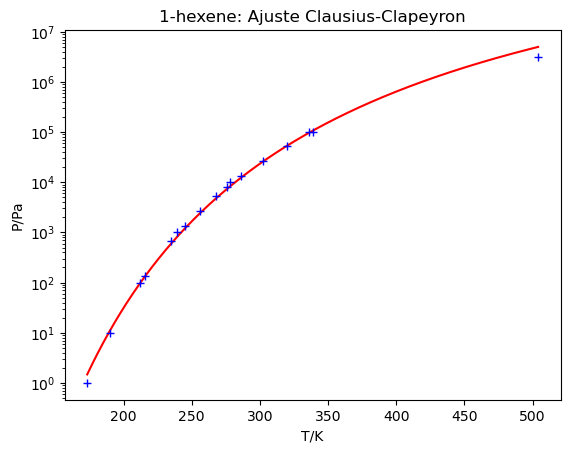

In [5]:
# Calcula los parámetros de la ecuación de Clausius-Clapeyron A y B
# La función polyfit devuelve los dos parámetros del ajuste,
# empezando por los de mayor orden
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
sustancia= '1-hexene'
PC_row = df.iloc[:, 5] / 1e-6  
TC_row = df.iloc[:,4]  
Tb_row = df.iloc[:,7]  
fuente_row = df.iloc[:, 0]
# Inicializamos listas para almacenar los resultados para cada columna
results_list = []
Ts_list = []
Ps_list = []
Tb_list = []
fuente_list = []
# Iteramos sobre las columnas
for idx in range(len(PC_row)):
    PC = PC_row[idx]
    TC = TC_row[idx]
    Tb = Tb_row[idx]
    fuente = fuente_row[idx]
    Ts1 = 273.15 + np.array([-99.8, -82.8, -61.4, -33.7, 5.2, 63.1, TC - 273.15])  # Datos Crc handbook
    Ts2 = 273.15 + np.array([-57.5, -38, -28.1, -17.2, -5.0, 2.8, 13, 29, 46.8, 66])  # Datos Perrys chemical engineering handbook
    Ps1 = np.array([1, 10, 100, 1000, 1e4, 1e5, PC])  # Datos Crc handbook
    Ps2 = (101325/760) * np.array([1, 5, 10, 20, 40, 60, 100, 200, 400, 760])  # Datos Perrys chemical engineering handbook en mmHg pasando a Pa
    Ts = np.sort(np.concatenate((Ts1, Ts2)))
    Ps = np.sort(np.concatenate((Ps1, Ps2)))
    B, A = np.polyfit(1/Ts, np.log(Ps), 1)
    TbCC = -B/(A-np.log(101325))
    # Almacenamos los resultados para cada columna
    Ts_list.append(Ts)
    Ps_list.append(Ps)
    # Representa la ecuación y los datos experimentales
    T_gr = np.linspace(Ts[0], Ts[-1], 1000)
    Ps_gr = np.exp(A + B/T_gr)
    rango = f"{int(Ts[1])}-{int(Ts[-1])}"
# Almacenamos los resultados para cada columna en un diccionario
    result_dict = {
        'Fuente': fuente,
        'A': A,
        'B': -B,
        'Rango T,K':rango,
        'Entalpía vaporización (B*R)': -B * R,
        'Tb calculada a 101325 Pa': -B / (A - np.log(101325)),
        'Error relativo': abs((1 - TbCC / Tb) * 100)
    }

    # Agregamos el diccionario a la lista de resultados
    results_list.append(result_dict)

# Creamos un DataFrame a partir de la lista de resultados
# results_df = pd.DataFrame(results_list.iloc[:, :-1]) duplicada columna de error 
results_df = pd.DataFrame(results_list)
# Encuentra el índice del mínimo valor en la última columna
indice_min_error = results_df.iloc[:, -1].idxmin()

# Obtiene la fila correspondiente al índice mínimo
fila_min_error = results_df.loc[indice_min_error]

# Crea un nuevo DataFrame con la fila del mínimo error relativo
min_error_df = pd.DataFrame(fila_min_error).transpose()

# Imprime el DataFrame con la fila del mínimo error relativo
display(results_df)
print("\n")
print('los datos con el error minimo son los siguientes')
print("\n")
display(min_error_df)
# obtener variables de la fila con minimo error para graficarla
indice_min_error = results_df['Error relativo'].idxmin()
fila_min_error = results_df.loc[indice_min_error]
fuente_min_error = fila_min_error['Fuente']
A_min_error = fila_min_error['A']
B_min_error = -fila_min_error['B']
Ts_min_error = Ts_list[indice_min_error]
Ps_min_error = Ps_list[indice_min_error]

# Calcular los datos de la ecuación y los datos experimentales para la fila_min_error
T_gr_min_error = np.linspace(Ts_list[0][0], Ts_list[0][-1], 1000)
Ps_gr_min_error = np.exp(A_min_error + B_min_error / T_gr_min_error)
plt.semilogy(T_gr_min_error, Ps_gr_min_error, 'r')
plt.semilogy(Ts_min_error, Ps_min_error, 'b+')
plt.xlabel('T/K')
plt.ylabel('P/Pa')
plt.title(sustancia + ': Ajuste Clausius-Clapeyron')
plt.show()



## Ajuste Antoine

Optimization terminated successfully.
         Current function value: 0.035727
         Iterations: 216
         Function evaluations: 391
Optimization terminated successfully.
         Current function value: 0.035678
         Iterations: 211
         Function evaluations: 382
Optimization terminated successfully.
         Current function value: 0.035630
         Iterations: 236
         Function evaluations: 429
Optimization terminated successfully.
         Current function value: 0.035648
         Iterations: 200
         Function evaluations: 355
Optimization terminated successfully.
         Current function value: 0.035609
         Iterations: 229
         Function evaluations: 408
Optimization terminated successfully.
         Current function value: 0.035654
         Iterations: 241
         Function evaluations: 431


,Fuente,A_opt,B_opt,C_opt,T/K,"Rango T,K"
0,NIST,9.301,1314.510,-32.007,173.350,190-500
1,Chemeo,9.299,1313.641,-32.070,173.350,190-500
2,CRC,9.297,1312.894,-32.124,173.350,190-500
3,PGL,9.294,1311.689,-32.211,173.350,190-500
4,Media,9.292,1311.030,-32.259,173.350,190-500
5,Joback,9.295,1311.873,-32.198,173.350,190-500




Valores experimentales y calculados para NIST


,T,Ps (exp) Pa,Ps (CC)) Pa,Ps (An) Pa,$E_r$
0,173.350,1.000,1.476,1.002,0.245
1,190.350,10.000,11.427,9.989,0.105
2,211.750,100.000,94.158,97.259,2.741
3,215.650,133.322,132.189,139.072,4.312
4,235.150,666.612,608.939,676.615,1.501
5,239.450,1000.000,824.740,921.454,7.855
6,245.050,1333.224,1204.922,1352.195,1.423
7,255.950,2666.447,2403.052,2699.977,1.257
8,268.150,5332.895,4868.742,5427.717,1.778
9,275.950,7999.342,7400.557,8177.244,2.224


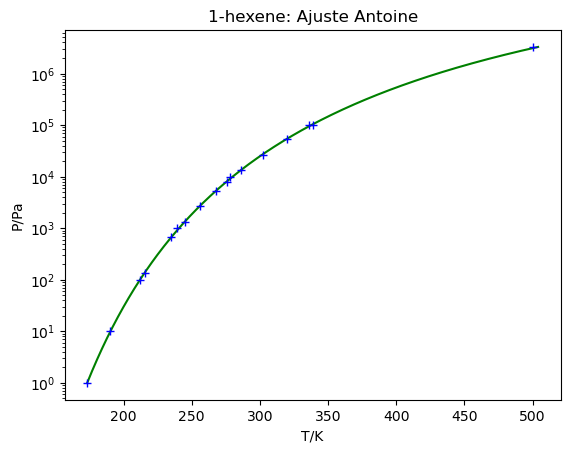

In [6]:
from scipy import optimize
# Importa de la librería scipy la parte de optimización

for idx in range(len(PC_row)):
    # Almacenamos los resultados para cada columna
    Ts_list.append(Ts)
    Ps_list.append(Ps)

def Ps_An(k, T):
    '''
    Función de la ecuación de Antoine en función de los parámetros, k, T
    Ps = 10^(A-B/(T+C))
    Returns saturation pressure at T for Antoine parameters (k).
    Arguments:
    k   – Antoine parameters, must be a vector with 3 Antoine Parameters[A, B, C]
    '''
    return 10**(k[0] - k[1] / (T + k[2]))

def desv_Ps(k, Ts_list, Ps_list):
    '''
    Returns standard deviation for Antoine equation
    Ps = 10^(A-B/(Ts+C))
    Arguments:
    k        – Antoine parameters, must be a vector with Antoine Parameters[A, B, C]
    Ts_list  - Experimental values of temperature lists for each source
    Ps_list  - Experimental values of saturation pressure lists for each source
    '''
    total_deviation = 0.0
    num_sources = len(Ts_list)

    for source in range(num_sources):
        Ts = Ts_list[source]
        Ps = Ps_list[source]
        total_deviation += sum((((Ps - 10**(k[0] - k[1] / (Ts + k[2]))) / Ps)**2) / len(Ps))

    return (total_deviation / num_sources)**0.5

# Crear listas para almacenar los resultados finales
fuentes = []
A_opts = []
B_opts = []
C_opts = []
T_Ks = []

# Iteración sobre las fuentes
for idx in range(len(PC_row)):
    PC = PC_row[idx]
    TC = TC_row[idx]
    Tb = Tb_row[idx]
    fuente = fuente_row[idx]
    Ts1 = 273.15 + np.array([-99.8, -82.8, -61.4, -33.7, 5.2, 63.1, TC - 273.15])  # Datos Crc handbook
    Ts2 = 273.15 + np.array([-57.5, -38, -28.1, -17.2, -5.0, 2.8, 13, 29, 46.8, 66])  # Datos Perrys chemical engineering handbook
    Ps1 = np.array([1, 10, 100, 1000, 1e4, 1e5, PC])  # Datos Crc handbook
    Ps2 = (101325/760) * np.array([1, 5, 10, 20, 40, 60, 100, 200, 400, 760])  # Datos Perrys chemical engineering handbook en mmHg pasando a Pa
    Ts = np.sort(np.concatenate((Ts1, Ts2)))
    Ps = np.sort(np.concatenate((Ps1, Ps2)))

    B, A = np.polyfit(1/Ts, np.log(Ps), 1)

    Ts_list.append(Ts)
    Ps_list.append(Ps)
    rango = f"{int(Ts[1])}-{int(Ts[-1])}"
    # Optimiza los parámetros de la ecuación de Antoine minimizando la desviación
    kopts = optimize.fmin(desv_Ps, [A / np.log(10), -B / np.log(10), 0], args=(Ts_list, Ps_list))
    
    # Almacenar los resultados en listas
    fuentes.append(fuente)
    A_opts.append(kopts[0])
    B_opts.append(kopts[1])
    C_opts.append(kopts[2])
    T_Ks.append(Ts[0])  
    
# Crear un DataFrame con los resultados finales
results_table = pd.DataFrame({
    'Fuente': fuentes,
    'A_opt': A_opts,
    'B_opt': B_opts,
    'C_opt': C_opts,
    'T/K': T_Ks,
    'Rango T,K':rango
})

# Mostrar la tabla
display(results_table)
# Mostrar los resultados
print("\n")

indice_min_error = results_df['Error relativo'].idxmin()
fila_min_error = results_table.loc[indice_min_error]
columnas_fila_min_error = fila_min_error.iloc[1:]
print( 'Valores experimentales y calculados para', fila_min_error.iloc[0])
kopt = fila_min_error[['A_opt', 'B_opt', 'C_opt']].to_numpy()

for i in range(len(Ts)):
    comparacion = pd.DataFrame({
    'T': Ts,
    'Ps (exp) Pa': Ps,
    'Ps (CC)) Pa': np.exp(A_min_error + B_min_error / Ts),
    'Ps (An)  Pa': [Ps_An(kopt, t) for t in Ts],
    '$E_r$':abs((Ps-[Ps_An(kopt, t) for t in Ts])/Ps)*100
})

# Imprimir el DataFrame
display(comparacion)
# Grafica el ajuste
plt.semilogy(T_gr_min_error, Ps_An(kopt, T_gr_min_error), 'g')
# Añade los puntos experimentales
plt.semilogy(Ts, Ps, 'b+') ## falta poner que sean los Ts y Ps del minimo error
plt.xlabel('T/K')
plt.ylabel('P/Pa')
plt.title(sustancia + ': Ajuste Antoine')
plt.show()

## Factor acentrico

,Fuente,T/K,P/Pa,A_opt,B_opt,C_opt,$\omega$$_{Calc}$,$\omega$,error
0,NIST,173.350,159831.806,9.302,1315.000,-31.971,0.303,,
1,Chemeo,173.350,159776.265,9.301,1314.510,-32.007,0.303,0.285,6.31%
2,CRC,173.350,159725.066,9.300,1314.059,-32.040,0.303,0.280,8.26%
3,PGL,173.350,159641.418,9.298,1313.320,-32.093,0.294,0.281,4.70%
4,Media,173.350,159590.384,9.297,1312.870,-32.126,0.301,0.282,6.82%
5,Joback,173.350,148008.544,9.298,1313.322,-32.093,0.343,,


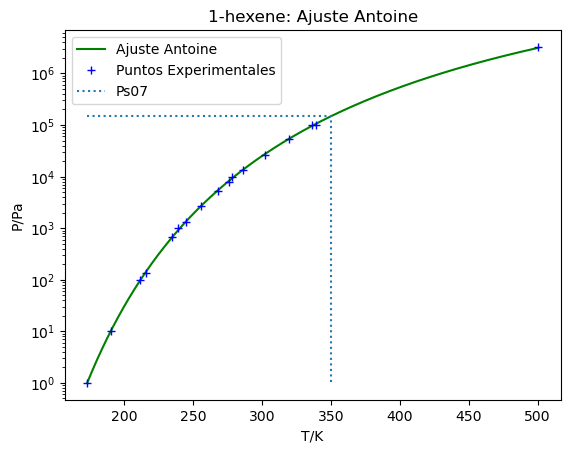

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

# Obtener las columnas relevantes del DataFrame
PC_row = df.iloc[:, 5] / 1e-6
TC_row = df.iloc[:, 4]
fuente_row = df.iloc[:, 0]

# Inicializar listas para almacenar los resultados para cada columna
results_list = []
Ts_list = []
Ps_list = []
fuente_list = []
A_opt_list = []  # Nueva lista para A_opt
B_opt_list = []  # Nueva lista para B_opt
C_opt_list = []  # Nueva lista para C_opt

for idx in range(len(PC_row)):
    PC = PC_row[idx]
    TC = TC_row[idx]
    fuente = fuente_row[idx]
    fila_resultados = results_table.iloc[idx]
    
    # Calcula el factor acentrico
    FA = -np.log10(Ps_An(fila_resultados[['A_opt', 'B_opt', 'C_opt']].to_numpy(), 0.7 * TC) / PC) - 1

    # Agrega los resultados a las listas
    fuente_list.append(fuente)
    Ts_list.append(fila_resultados['T/K'])
    Ps_list.append(Ps_An(fila_resultados[['A_opt', 'B_opt', 'C_opt']].to_numpy(), 0.7 * TC))
    results_list.append(FA)
    A_opt_list.append(fila_resultados['A_opt'])  # Agregar A_opt a la lista
    B_opt_list.append(fila_resultados['B_opt'])  # Agregar B_opt a la lista
    C_opt_list.append(fila_resultados['C_opt'])  # Agregar C_opt a la lista
   
 # Crear un nuevo DataFrame con los resultados
resultados_df = pd.DataFrame({
    'Fuente': fuente_list,
    'T/K': Ts_list,
    'P/Pa': Ps_list,
    'A_opt': A_opt_list,  
    'B_opt': B_opt_list,  
    'C_opt': C_opt_list,   
    '$\omega$$_{Calc}$': results_list
})

# Concatenar la columna ' $\omega$' de la tabla en la segunda celda
resultados_df = pd.concat([resultados_df, df[' $\omega$']], axis=1)

# Convertir ' $\omega$' a valores numéricos ya que algunos valores son cadenas de texto ' ' para que se viera el hueco en la tabla 
resultados_df[' $\omega$'] = pd.to_numeric(resultados_df[' $\omega$'], errors='coerce') #con errors='coerce' las cadenas de texto se convierte en Nan

# Crear la columna de error relativo con formato de porcentaje
# Comprobar que no hay valores nulos, si lo son se quedan como None sino realiza la operación antes del if 
# lambda funciona con apply como una función condicional 
resultados_df['error'] = resultados_df.apply(lambda row: 
    '{:.2f}%'.format((abs(row['$\omega$$_{Calc}$'] - row[' $\omega$']) / abs(row[' $\omega$'])) * 100)
    if pd.notna(row[' $\omega$']) else None, axis=1)

# Reemplazar NaN y None con cadenas vacías
resultados_df = resultados_df.replace({np.nan: '', None: ''})
display(resultados_df)

# Graficar el ajuste
plt.semilogy(T_gr, Ps_An(kopt, T_gr), 'g', label='Ajuste Antoine')
plt.semilogy(Ts, Ps, 'b+', label='Puntos Experimentales')
Ps07 = Ps_An(kopt, 0.7 * TC)
plt.semilogy([Ts[0], 0.7 * TC, 0.7 * TC], [Ps07, Ps07, Ps[0]], ':', label='Ps07')
plt.xlabel('T/K')
plt.ylabel('P/Pa')
plt.title(f'{sustancia}: Ajuste Antoine')
plt.legend()
plt.show()


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

# Inicializar listas para almacenar los resultados para cada columna
results_list = []
Ts_list = []
Ps_list = []
fuente_list = []
A_list = []
B_list = []
C_list = []

for idx in range(len(PC_row)):
    PC = PC_row[idx]
    TC = TC_row[idx]
    fuente = fuente_row[idx]
    fila_resultados = results_table.iloc[idx]

    # Calcula el nuevo valor de los parámetros optimizados eliminando el punto crítico
    def desv_Ps(k, Ts=Ts[:-1], Ps=Ps[:-1]):
        A_opt, B_opt, C_opt = k;
        return sum((((Ps - 10**(A_opt - B_opt/(Ts + C_opt)))/Ps)**2)/len(Ps))**0.5;

    parametros_optimizados = fila_resultados[['A_opt', 'B_opt', 'C_opt']].to_numpy()
    desviacion = desv_Ps(parametros_optimizados, Ts=Ts[:-1], Ps=Ps[:-1]);
    k0 = fila_resultados[['A_opt', 'B_opt', 'C_opt']].to_numpy();
    k_no_pc = optimize.fmin(desv_Ps, k0, args=(Ts[:-1], Ps[:-1]));
    FA_no_pc = -np.log10(Ps_An(k_no_pc, 0.7*TC)/PC)-1;

    # Agrega los resultados a las listas
    fuente_list.append(fuente)
    Ts_list.append(fila_resultados['T/K'])
    Ps_list.append(Ps_An(fila_resultados[['A_opt', 'B_opt', 'C_opt']].to_numpy(), 0.7 * TC))
    results_list.append(FA_no_pc)
    A_list.append(k_no_pc[0])
    B_list.append(k_no_pc[1])
    C_list.append(k_no_pc[2])

# Crear un nuevo DataFrame con los resultados
resultados_df2 = pd.DataFrame({
    'Fuente': fuente_list,
    'T/K': Ts_list,
    'P/Pa': Ps_list,
    'A': A_list,
    'B': B_list,
    'C': C_list,
    '$\omega$$_{Calc}$': results_list
})

# Concatenar la columna ' $\omega$' de la tabla en la segunda celda
resultados_df2 = pd.concat([resultados_df2, df[' $\omega$']], axis=1)

# Convertir ' $\omega$' a valores numéricos ya que algunos valores son cadenas de texto ' ' para que se viera el hueco en la tabla 
resultados_df2[' $\omega$'] = pd.to_numeric(resultados_df2[' $\omega$'], errors='coerce')  # con errors='coerce' las cadenas de texto se convierten en NaN

# Crear la columna de error relativo con formato de porcentaje
# Comprobar que no hay valores nulos, si lo son se quedan como None sino realiza la operación antes del if 
# lambda funciona con apply como una función condicional 
resultados_df2['error'] = resultados_df2.apply(lambda row: 
    '{:.2f}%'.format((abs(row[' $\omega$'] - row['$\omega$$_{Calc}$']) / abs(row[' $\omega$'])) * 100)
    if pd.notna(row[' $\omega$']) else None, axis=1)

# Reemplazar NaN y None con cadenas vacías
resultados_df2 = resultados_df2.replace({np.nan: '', None: ''})
print()
print('los valores obtenidos sin el punto critico son:')
print()
display(resultados_df2)
print()
print('los valores con el punto critico son')
print()
display(resultados_df)
# Encuentra el índice del valor mínimo en la columna 'error'
indice_min_error3 = resultados_df2['error'].idxmin()

# Obtiene la fila correspondiente al índice mínimo
fila_min_error3 = resultados_df2.loc[indice_min_error]

Optimization terminated successfully.
         Current function value: 0.035562
         Iterations: 88
         Function evaluations: 162
Optimization terminated successfully.
         Current function value: 0.035562
         Iterations: 90
         Function evaluations: 165
Optimization terminated successfully.
         Current function value: 0.035562
         Iterations: 86
         Function evaluations: 158
Optimization terminated successfully.
         Current function value: 0.035562
         Iterations: 84
         Function evaluations: 161
Optimization terminated successfully.
         Current function value: 0.035562
         Iterations: 82
         Function evaluations: 154
Optimization terminated successfully.
         Current function value: 0.035562
         Iterations: 85
         Function evaluations: 162

los valores obtenidos sin el punto critico son:



,Fuente,T/K,P/Pa,A,B,C,$\omega$$_{Calc}$,$\omega$,error
0,NIST,173.350,159831.806,9.274,1303.814,-32.782,0.306,,
1,Chemeo,173.350,159776.265,9.274,1303.814,-32.782,0.306,0.285,7.48%
2,CRC,173.350,159725.066,9.274,1303.814,-32.782,0.306,0.280,9.40%
3,PGL,173.350,159641.418,9.274,1303.814,-32.782,0.297,0.281,5.75%
4,Media,173.350,159590.384,9.274,1303.814,-32.782,0.304,0.282,7.82%
5,Joback,173.350,148008.544,9.274,1303.814,-32.782,0.346,,



los valores con el punto critico son



,Fuente,T/K,P/Pa,A_opt,B_opt,C_opt,$\omega$$_{Calc}$,$\omega$,error
0,NIST,173.350,159831.806,9.302,1315.000,-31.971,0.303,,
1,Chemeo,173.350,159776.265,9.301,1314.510,-32.007,0.303,0.285,6.31%
2,CRC,173.350,159725.066,9.300,1314.059,-32.040,0.303,0.280,8.26%
3,PGL,173.350,159641.418,9.298,1313.320,-32.093,0.294,0.281,4.70%
4,Media,173.350,159590.384,9.297,1312.870,-32.126,0.301,0.282,6.82%
5,Joback,173.350,148008.544,9.298,1313.322,-32.093,0.343,,


## Entalpia de vaporizacion

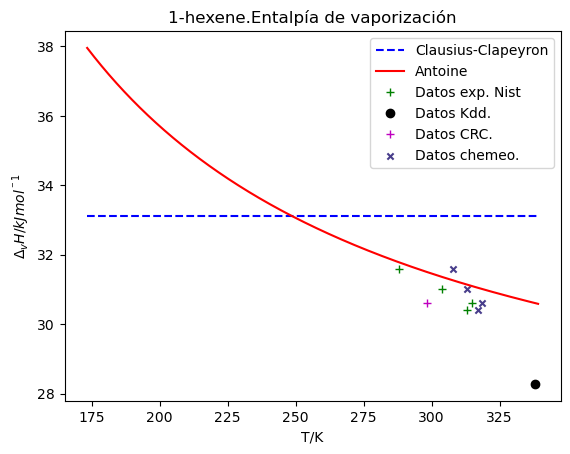

In [9]:
# Representar los datos de entalpía de vaporización calculados con la ecuación de Antoine
# ([313, 315,288,304], [30.4,30.6,31.6, 31.0], nist


fig_Hv, ax_Hv = plt.subplots()
# Grafica el ajuste en el rango de los puntos experimentales
T_gr = np.linspace(Ts[0], Ts[-2],1000)
plt.plot([Ts[0], Ts[-2]], R*np.array([-B, -B])/1e3, '--b', label='Clausius-Clapeyron')
plt.plot(T_gr, R*np.log(10)/1000*k_no_pc[1]/(1+k_no_pc[2]/T_gr)**2, '-r',label='Antoine')
# Añade los puntos experimentales
plt.plot([313, 315,288,304], [30.4,30.6,31.6, 31.0], '+g', label='Datos exp. Nist')
plt.plot([337.90],[28.28],'ok',label='Datos Kdd.')
plt.plot([298.15],[30.61],'+m',label='Datos CRC.')
plt.scatter([337.90,318.50,317.00	,313.00,308.00],[28.28,30.60,30.40,31.00,31.60],marker='x', color='darkslateblue',s=20,label='Datos chemeo.')
plt.xlabel('T/K')
plt.ylabel('$\Delta_v H/kJ  mol^{^-1}$')
plt.title(sustancia+'.Entalpía de vaporización')
plt.legend()

# Calculo punto triple


Para calcular la presión del punto triple, dado que tenemos la temperatura tabulada, podemos obtenerla a partir de las ecuaciones de Clausius y de Antoine. Por una parte, sabemos que la ecuación de Clausius en un cambio de fases viene estimada por:

$\Delta_{L\rightarrow V}$ H $\approx -R\cdot\frac{d(\ln P_E)}{d(1/T)}$

donde la ecuación de Clausius viene dada de la forma $\ln P_e = A - \frac{B}{T}$. Entonces, la ecuación quedaría tal que: $\Delta_{S \rightarrow V} H \approx -R \cdot \left(-B\right)$
\
\
Por otra parte, si aplicamos la ecuación de Antoine $\log_{10} P_e = A - \frac{B}{T+C}$ en las proximidades del punto triple, la ecuación $\Delta_{L\rightarrow V}$ V $\approx -R\cdot\frac{d(\ln P_E)}{d(1/T)}$ daría el resultado de $ \begin{equation} \Delta_v H\approx R \cdot \ln(10) \cdot \frac{B}{\left(1 + \frac{C}{T}\right)^2} \end{equation}$

$\Delta$ H$_{sub}$ $\ $= $\ $$\Delta$ H$_{fus}$ + $\Delta$ H$_{vap} $

entonces podemos comparar la $\Delta$ H$_{sub} \ $ con ambas ecuaciones


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize


# Establecer el formato de visualización para mostrar solo tres decimales y formato científico
pd.set_option('display.float_format', '{:.3e}'.format)

# Definir las listas y variables necesarias
TT = [133.39]
hf = 9347
R = 8.314
fuente_list = []
PT_an_list = []
PT_cc_list = []
TT_Hsub_list = []
hvap_an_list = []
hsub_list = []
TT_Hsub_an_list = []
hsub_an_list = []
# Iterar sobre los puntos críticos
for idx in range(len(PC_row)):
    # Obtener los parámetros optimizados
    
    k12 = results_table.iloc[idx][['A_opt', 'B_opt', 'C_opt']].to_numpy()
    
    # Calcular la presión del punto triple usando la ecuación de Antoine
    
    PT_an = 10**(k12[0] - k12[1] / (TT[0] + k12[2]))
    
    # Calcular la entalpía de vaporización usando la ecuación de Antoine
    hvap_an = (R * np.log(10) ) *(k12[1] / ((1 + (k12[2] / TT[0]))**2)) #segun clase
    
    hsub = -(B*R)
    
    # Calcular la entalpía de sublimación sumando la entalpía de vaporización y la entalpía de fusión
    
    hsub_an =hvap_an+hf
    
    # Calcular la presión del punto triple usando la ecuación de Clausius-Clapeyron
    PT_cc = np.exp(A - (-B / TT[0]))

    # Calcular la presión del punto triple usando la ecuación modificada con Hsub
    TT_Hsub = np.exp(A - (hsub / (R*TT[0])))
    TT_Hsub_an = np.exp(A - (hsub_an / (R*TT[0])))

    # Agregar los resultados a las listas
    fuente_list.append(fuente_row[idx])
    PT_an_list.append(PT_an)
    PT_cc_list.append(PT_cc)
    TT_Hsub_list.append(TT_Hsub)
    hsub_list.append(hsub)
    hsub_an_list.append(hsub_an)
    TT_Hsub_an_list.append(TT_Hsub_an)
    # Convertir las listas a arreglos de NumPy
hsub_an_arr = np.array(hsub_an_list)
hsub_arr = np.array(hsub_list)

# Calcular el error relativo
error_rel = 100 * np.abs((hsub_an_arr - hsub_arr) / hsub_arr)                     
# Crear un DataFrame con los resultados
punto_triple = pd.DataFrame({
    'Fuente': fuente_list,
    '   PT Antoine': PT_an_list,
    '   PT Clausius Clapeyron': PT_cc_list,
    '     PT CC $\Delta$ H$_{sub}$  (Cc)': TT_Hsub_list,
    '     PT CC $\Delta$ H$_{sub}$  (An)': TT_Hsub_an_list,\
    '     $\Delta$ H$_{sub}$  (An)': hsub_an_list,
    '     $\Delta$ H$_{sub}$  (Cc)': hsub_list
    
    
})
# Agregar la columna 'Error (%)' al DataFrame
punto_triple['Error'] = error_rel

# Formatear la columna 'Error (%)' con dos decimales y símbolo de porcentaje
punto_triple['Error'] = punto_triple['Error'].apply(lambda x: f'{x:.2f}%')

# Imprimir el DataFrame
display(punto_triple)




,Fuente,PT Antoine,PT Clausius Clapeyron,PT CC $\Delta$ H$_{sub}$ (Cc),PT CC $\Delta$ H$_{sub}$ (An),$\Delta$ H$_{sub}$ (An),$\Delta$ H$_{sub}$ (Cc),Error
0,NIST,2.169e-04,1.490e-03,1.490e-03,2.669e-11,5.289e+04,3.311e+04,59.74%
1,Chemeo,2.165e-04,1.490e-03,1.490e-03,2.635e-11,5.291e+04,3.311e+04,59.79%
2,CRC,2.161e-04,1.490e-03,1.490e-03,2.604e-11,5.292e+04,3.311e+04,59.82%
3,PGL,2.154e-04,1.490e-03,1.490e-03,2.554e-11,5.294e+04,3.311e+04,59.89%
4,Media,2.149e-04,1.490e-03,1.490e-03,2.524e-11,5.296e+04,3.311e+04,59.93%
5,Joback,2.154e-04,1.490e-03,1.490e-03,2.554e-11,5.294e+04,3.311e+04,59.89%


de donde se puede ver claramente que la presion del punto triple con la entalpia de sublimacion calculada por el segundo metodo es demasiado bajo por lo que usaremos la presion del primer metodo

# Diagrama de Fases

Ajuste S/V: [-2478.37277135    10.12942977]
Presión estimada: 0.0015413407974530415
Parámetros A y B: 23.30413974642567 3972.2531357431835
Optimization terminated successfully.
         Current function value: 0.033619
         Iterations: 233
         Function evaluations: 424
Ajuste L/V: [   9.28173021 1307.57781476  -32.4419509 ]
Ajuste S/L: [ 2.56909362e+09 -1.25712872e+10]


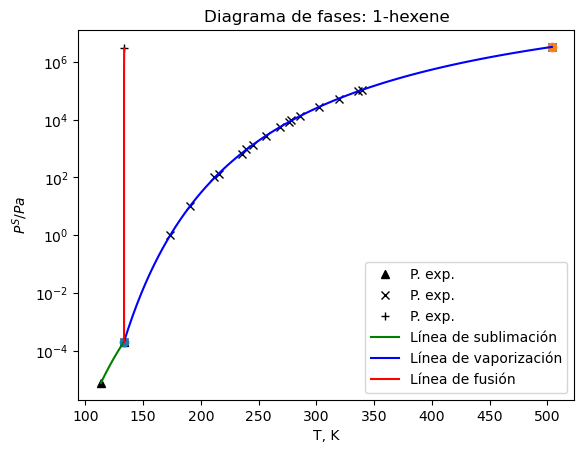

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

A = A_min_error
B = -B_min_error
Ts = Ts_min_error
Ps = Ps_min_error
# Línea de sublimación
TS = np.array([TT[0] - 20, TT[0]])
PS = np.array([np.exp(A - (B / (TT[0] - 20))), 2.138e-04])
Ts_graf = np.linspace(TS[0], TS[-1], 100)
CC_s = np.polyfit(1 / TS, np.log(PS), 1)
print('Ajuste S/V:', CC_s)

# Línea de vaporización
P = np.exp(A - (B / TT[0])) 
PL =  np.sort(np.append(2.138e-04, Ps)) 
TL =  np.sort(np.append(TT[0], Ts))
print('Presión estimada:', P)
print('Parámetros A y B:', A, B)
TL_graf = np.linspace(TL[0], TL[-1], 100)

def desv_PL(k, TS=TL, PS=PL):
    return sum((((PS - 10**(k[0] - k[1] / (TS + k[2]))) / PS)**2) / len(PS))**0.5

kopt = optimize.fmin(desv_PL, [CC_s[1] / np.log(10), -CC_s[0] / np.log(10), 0])
print('Ajuste L/V:', kopt)

# Línea de fusión
TF = (TT[0], TT[0]+0.15)
# PT = np.exp(A - (B / TT[0]))                 
PT = 2.138e-04
PV = np.exp(A - (hf / (R * TT[0])))
PF = np.array([PT, PV])
k_F = np.polyfit(np.log(TF), PF, 1)
PF_graf = np.linspace(PF[0], PF[-1], 100)
print('Ajuste S/L:', k_F)

# Representación de los datos experimentales
plt.semilogy(TS, PS, 'k^', TL, PL, 'kx', TF, PF, 'k+',label='P. exp.')
# Puntos crítico y triple
plt.semilogy(TS[-1], PS[-1], 'o', TL[-1], PL[-1], 'o')
# Líneas de ajuste
plt.semilogy(Ts_graf, np.exp(CC_s[1] + CC_s[0] / Ts_graf), '-g',label='Línea de sublimación')  
plt.semilogy(TL_graf, 10**(kopt[0] - kopt[1] / (TL_graf + kopt[2])), '-b',label='Línea de vaporización')  
plt.semilogy(np.exp((PF_graf - k_F[1]) / k_F[0]), PF_graf, '-r',label='Línea de fusión') 
plt.ylabel('$P^{S}/Pa$')
plt.xlabel('T, K')
plt.title('Diagrama de fases: ' + sustancia)
plt.legend()
plt.show()


Ajuste S/V: [-3972.25313574    23.30413975]
Presión estimada: 0.0015413407974530415
Parámetros A y B: 23.30413974642567 3972.2531357431835
Optimization terminated successfully.
         Current function value: 0.154377
         Iterations: 217
         Function evaluations: 386
Ajuste L/V: [   9.75891858 1556.42541348  -11.4848997 ]
Ajuste S/L: [ 2.56909362e+09 -1.25712871e+10]


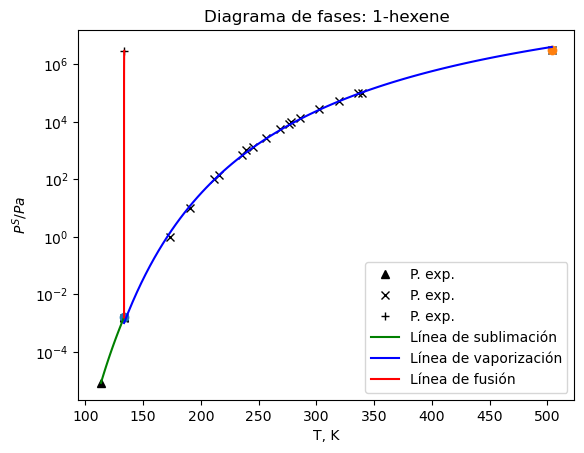

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

A = A_min_error
B = -B_min_error
Ts = Ts_min_error
Ps = Ps_min_error
# Línea de sublimación
TS = np.array([TT[0] - 20, TT[0]])
PS = np.array([np.exp(A - (B / (TT[0] - 20))), np.exp(A - (B / TT[0]))])
Ts_graf = np.linspace(TS[0], TS[-1], 100)
CC_s = np.polyfit(1 / TS, np.log(PS), 1)
print('Ajuste S/V:', CC_s)

# Línea de vaporización
P = np.exp(A - (B / TT[0])) 
PL =  np.sort(np.append(PT_cc, Ps)) 
TL =  np.sort(np.append(TT[0], Ts))
print('Presión estimada:', P)
print('Parámetros A y B:', A, B)
TL_graf = np.linspace(TL[0], TL[-1], 100)

def desv_PL(k, TS=TL, PS=PL):
    return sum((((PS - 10**(k[0] - k[1] / (TS + k[2]))) / PS)**2) / len(PS))**0.5

kopt = optimize.fmin(desv_PL, [CC_s[1] / np.log(10), -CC_s[0] / np.log(10), 0])
print('Ajuste L/V:', kopt)

# Línea de fusión
TF = (TT[0], TT[0]+0.15)
PT = np.exp(A - (B / TT[0]))
PV = np.exp(A - (hf / (R * TT[0])))
PF = np.array([PT, PV])
k_F = np.polyfit(np.log(TF), PF, 1)
PF_graf = np.linspace(PF[0], PF[-1], 100)
print('Ajuste S/L:', k_F)

# Representación de los datos experimentales
plt.semilogy(TS, PS, 'k^', TL, PL, 'kx', TF, PF, 'k+',label='P. exp.')
# Puntos crítico y triple
plt.semilogy(TS[-1], PS[-1], 'o', TL[-1], PL[-1], 'o')
# Líneas de ajuste
plt.semilogy(Ts_graf, np.exp(CC_s[1] + CC_s[0] / Ts_graf), '-g',label='Línea de sublimación')  
plt.semilogy(TL_graf, 10**(kopt[0] - kopt[1] / (TL_graf + kopt[2])), '-b',label='Línea de vaporización')  
plt.semilogy(np.exp((PF_graf - k_F[1]) / k_F[0]), PF_graf, '-r',label='Línea de fusión') 
plt.ylabel('$P^{S}/Pa$')
plt.xlabel('T, K')
plt.title('Diagrama de fases: ' + sustancia)
plt.legend()
plt.show()

# Ecuacion del Virial

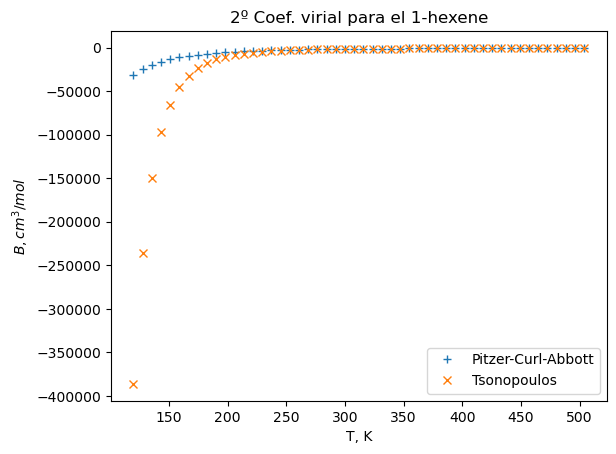

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# Estimacion de B por Pitzer-Curl
R = 8.314
Tb = 337.200
TC = 504.000#K
TT = 119.55 #K
PC = 3.210/ 1e-6  
VC = 355.100*1e-6 #m^3/mol
FA = 0.280
# Condiciones
P = 3e6;
T = np.linspace(TT, TC, 50);
Tr = T/TC
def B_Pit(T,TC=TC,PC=PC,FA=FA):
    # Estimacion con Pitzer y Curl
    B0 = 0.083-0.422/(T/TC)**1.6
    B1 = 0.139-0.172/(T/TC)**4.2
    B_Pit = R*TC/PC*(B0+FA*B1)*1e6
    return B_Pit
def B_Ts(T,TC,a=0,b=0):
    # Tsonopoulos
    Tr = T/TC
    f0 = 0.1445-0.330/Tr-0.1385/Tr**2-0.0121/Tr**3-0.000607/Tr**8
    f1 = 0.0637+0.331/Tr**2-0.423/Tr**3-0.008/Tr**8
    f2 = 1/Tr**6
    f3 = 1/Tr**8
    B_Ts = R*TC/PC*(f0+FA*f1+a*f2+b*f3)
    return B_Ts
plt.plot(T, B_Pit(T,TC,PC,FA), '+', label='Pitzer-Curl-Abbott')
plt.plot(T, B_Ts(T, TC)*1e6, 'x', label='Tsonopoulos')
plt.xlabel('T, K')
plt.ylabel('$B, cm^3/mol$')
plt.title('2º Coef. virial para el ' + sustancia)
plt.legend()
plt.show()


En este caso como el factor de correlacion de pitzer y curl  modificado por abbot que es el que estamos usando solo se puede aplicar a sustancias no polares y el 1-hexeno es insoluble en agua  segun la bibliografia "Physical Constants of Organic Compounds", in CRC Handbook of Chemistry and Physics, Internet Version 2005, David
R. Lide, ed., <http://www.hbcpnetbase.com>, CRC Press, Boca Raton, FL, 2005. Ademas tambien lo podemos ver con la constante de solubilidad en chemeo  para Log10 of Water solubility in mol/l. tiene un valor de -3.23 que es un valor de solubilidad bajo por tanto la sustancia tiene un caracter apolar y se puede aplicar sin ningun problema

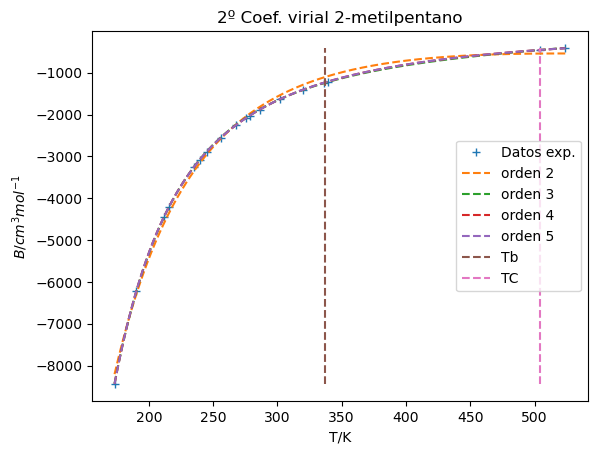

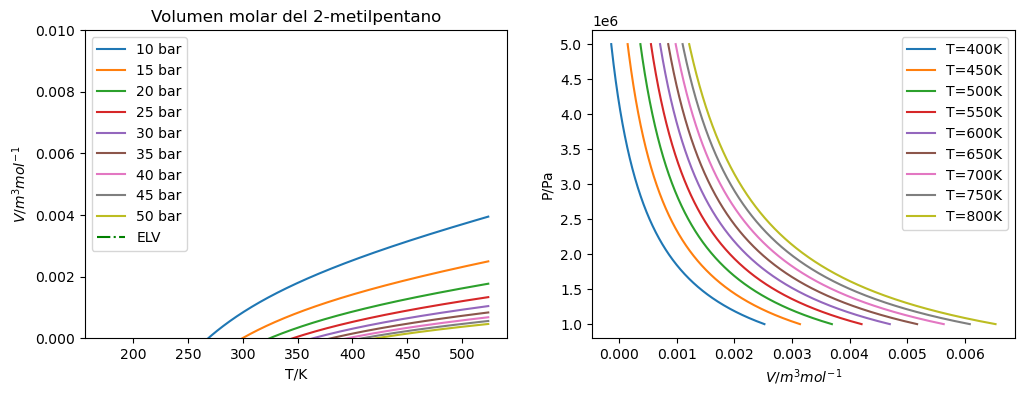

,Orden,Coeficiente 1,Coeficiente 2,Coeficiente 3,Coeficiente 4,Coeficiente 5
0,2,-5.839e+03,-4.975e+03,-1.598e+03,0.000e+00,0.000e+00
1,3,-3.251e+03,-4.617e+03,-4.358e+03,-1.687e+03,0.000e+00
2,4,-8.894e+02,-2.730e+03,-4.441e+03,-4.436e+03,-1.687e+03
3,5,-2.077e+01,-8.722e+02,-2.728e+03,-4.444e+03,-4.436e+03


In [14]:
import numpy as np
import matplotlib.pyplot as plt
resultados = {'Orden': [], 'Coeficiente 1': [], 'Coeficiente 2': [], 'Coeficiente 3': [], 'Coeficiente 4': [], 'Coeficiente 5': []}
Ts = np.append(Ts, TC + 20)
T = Ts
plt.plot(T, B_Pit(T, TC, PC, FA), '+', label='Datos exp.')
T_gr = np.linspace(T[0], T[-1], 1000)
a = {}
r_2 = {}

# Añadir resultados al diccionario
for i in range(2, 6):
    a[i] = np.polyfit(298.15 / T - 1, B_Pit(T, TC, PC, FA), i)
    resultados['Orden'].append(i)
    # Llenar los coeficientes en el diccionario
    for j in range(1, 6):
        coeficiente = a[i][j-1] if j <= len(a[i]) else 0
        resultados[f'Coeficiente {j}'].append(coeficiente)
    B_gr = np.polyval(a[i], 298.15 / T_gr - 1)
    B_cal = np.polyval(a[i], 298.15 / T - 1)
    plt.plot(T_gr, B_gr, '--', label='orden ' + str(i))


plt.plot([Tb,Tb],[B_Pit(T,TC,PC,FA)[0],B_Pit(T,TC,PC,FA)[-1]],'--',label='Tb')
plt.plot([TC,TC],[B_Pit(T,TC,PC,FA)[0],B_Pit(T,TC,PC,FA)[-1]],'--',label='TC')
plt.xlabel('T/K')
plt.ylabel('$B/cm^3 mol^{-1}$')
plt.title('2º Coef. virial 2-metilpentano')
plt.legend()
plt.show()
print('\n' * 2)
# cálculo del volumen molar en función de P y T
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Presión entre 10 y 50 bar
for P in range(10, 51, 5):
    V = R*T_gr/(P*1e5)+1e-6*np.polyval(a[4], 298.15/T_gr-1)
    axes[0].plot(T_gr, V, label=str(P)+' bar')
axes[0].set_xlabel('T/K')
axes[0].set_ylabel('$V/m^3 mol^{-1}$')
axes[0].set_title('Volumen molar del 2-metilpentano')
axes[0].set_ylim(0,0.01)
# Datos de volumen molar del vapor de agua en condiciones de saturación
# (equilibrio líquido-vapor)
P=np.exp(A-(B/(TT))) 
Pexp=np.array([P,PC])
Texp=np.array([TT,TC])
Pexp_array = np.array([P, PC])
Texp = np.array([TT, TC])
for Pexp_value in Pexp_array:
    Vexp = R * Texp / (Pexp_value * 1e5) + 1e-6 * np.polyval(a[4], 298.15 / Texp - 1)
k = 12  # Primer valor experimental a representar
axes[0].plot(Texp[k:], Vexp[k:], '-.g', label = 'ELV')
axes[0].legend()
# Representación P-V
for T_gr2 in range(400,801,50):
    P_gr2 = 1e5*np.linspace(10,50,550)
    V_gr2 = R*T_gr2/P_gr2+1e-6*np.polyval(a[4],298.15/T_gr2-1)
    axes[1].plot(V_gr2,P_gr2,label='T='+str(T_gr2)+'K')
# Extraer los índices de los valores entre 1e6 y 5e6 en Pexp
indices = [i for i in range(len(Pexp)) if (0.9e6 <= Pexp[i] <= 5.5e6)]
# axes[1].plot([Vexp[i] for i in indices],[Pexp[i] for i in indices], '-.g', label = 'VLE')
axes[1].set_ylabel('P/Pa')
axes[1].set_xlabel('$V/m^3 mol^{-1}$')
axes[1].legend()
plt.show()
# Crear un DataFrame a partir del diccionario
df_resultados = pd.DataFrame(resultados)
print('\n' * 2)
display(df_resultados)

In [15]:
import numpy as np
import pandas as pd

# Aplicación de la ecuación de estado del virial
# Basada en el 2º coeficiente V = RT/P + B
# Calculo de los coeficientes de expansión y compresibilidad
R = 8.314

# Metano
aB = np.array([-2.077e+01, -8.722e+02, -2.728e+03, -4.444e+03, -4.436e+03])

# Condiciones
P = 3e6
T = 500

# Calculo de B y dB/dT
B = np.polyval(aB, 298.15/T - 1)
V = R*T/P + B*1e-6
dBdT = np.polyval(np.polyder(aB), 298.15/T - 1) * (-298.15/T**2)

# Calculo de los coeficientes
alfa = 1/V * (R/P + dBdT*1e-6)
kappa = 1/V * (R*T/P**2)

# Crear un DataFrame
data = {'Volumen molar (V)': ['%.4e' % V],
        '$\\alpha$': ['%.4e' % alfa],
        '$\kappa$': ['%.4e' % kappa]}

df7 = pd.DataFrame(data)

# Imprimir el DataFrame
display(df7)


,Volumen molar (V),$\alpha$,$\kappa$
0,-1.6441e-03,-3.6170e-03,-2.8095e-07


# Ecuaciones-cubicas-de-estado

In [17]:
def PVW(TC,PC,V,T):
    R=8.3143
    a=27/64*(R*TC)**2/PC
    b=1/8*R*TC/PC
    P=R*T/(V-b)-a/V**2
    return P
def PRK(TC,PC,V,T):
    R=8.3143
    a=0.42748*(TC/T)**0.5*(R*TC)**2/PC
    b=0.08664*R*TC/PC
    P=R*T/(V-b)-a/(V*(V+b))
    return P
def PSRK(TC,PC,FA,V,T):
    R=8.3143
    b=0.08664*R*TC/PC
    m=0.48+1.574*FA-0.176*FA**2
    alfa=(1+m*(1-(T/TC)**0.5))**2
    a=0.42748*alfa*(R*TC)**2/PC
    P=R*T/(V-b)-a/(V*(V+b))
    return P
def PPR(TC,PC,FA,V,T):
    R=8.3143
    b=0.077796*R*TC/PC
    m=0.37464+1.54226*FA-0.26992*FA**2
    alfa=(1+m*(1-(T/TC)**0.5))**2
    a=0.457235*alfa*(R*TC)**2/PC
    P=R*T/(V-b)-a/(V*(V+b)+b*(V-b))
    return P
def VVW(TC,PC,P,T):
    R = 8.3143
    a = 27/64*(R*TC)**2/PC
    b = 1/8*R*TC/PC
    return np.roots([P,-(b*P+R*T),a,-a*b])
def VRK(TC,PC,P,T):
    R = 8.3143
    alfa = (T/TC)**0.5
    a = 0.42748*alfa*(R*TC)**2/(T/TC)**0.5/PC
    b = 0.08664*R*TC/PC
    return np.roots([P,-R*T,a*alfa-b**2*P-R*T*b,-a*alfa*b])
def VSRK(TC,PC,FA,P,T):
    R = 8.3143
    b = 0.08664*R*TC/PC
    m = 0.48+1.574*FA-0.176*FA**2
    alfa = (1+m*(1-(T/TC)**0.5))**2
    a = 0.42748*alfa*(R*TC)**2/PC
    return np.roots([P,-R*T,a*alfa-b**2*P-R*T*b,-a*alfa*b])
def VPR(TC,PC,FA,P,T):
    R = 8.3143
    b = 0.077796*R*TC/PC
    m = 0.37464+1.54226*FA-0.26992*FA**2
    alfa = (1+m*(1-(T/TC)**0.5))**2
    a = 0.457235*alfa*(R*TC)**2/PC
    return np.roots([P,b*P-R*T,a*alfa-3*b**2*P-2*R*T*b,b**3*P+R*T*b**2-a*alfa*b])

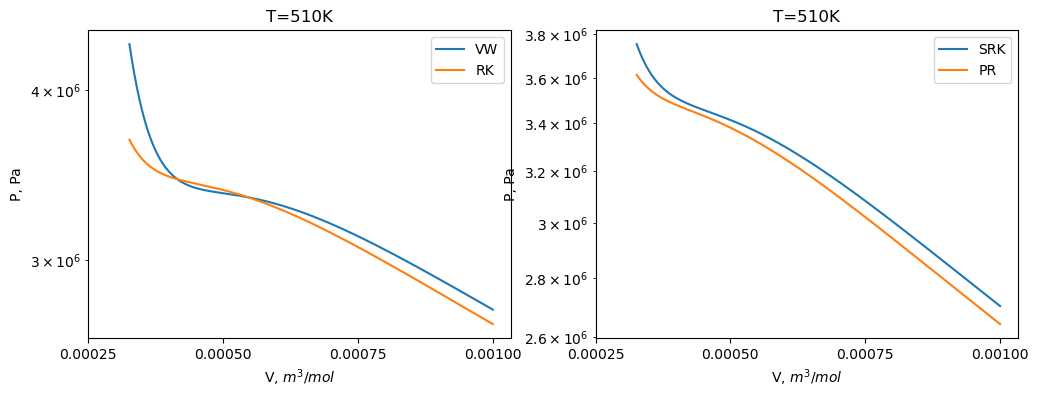

In [18]:
import numpy as np
import matplotlib.pyplot as plt
VC = 355.10
M = 84.16
V = np.linspace(1/4*R*TC/PC,1e-3,1000)
T = 510
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].semilogy(V, PVW(TC,PC,V,T), label="VW")
axes[0].semilogy(V, PRK(TC,PC,V,T), label="RK")
axes[0].set_xlabel('V, $m^3/mol$')
axes[0].set_ylabel('P, Pa')
axes[0].legend()
axes[0].set_title('T='+str(T)+'K')
axes[0].set_xticks([0.00025, 0.00050, 0.00075,0.001])
axes[1].semilogy(V, PSRK(TC,PC,FA,V,T), label="SRK")
axes[1].semilogy(V, PPR(TC,PC,FA,V,T), label="PR")
axes[1].set_xlabel('V, $m^3/mol$')
axes[1].set_ylabel('P, Pa')
axes[1].legend()
axes[1].set_title('T='+str(T)+'K')
axes[1].set_xticks([0.00025, 0.00050, 0.00075,0.001])
plt.show()

V =  0.000561 m^3/mol
Presión inicial: 25.74 bar
Presión final: 38.08 bar
Cambio de presión: 12.34 bar


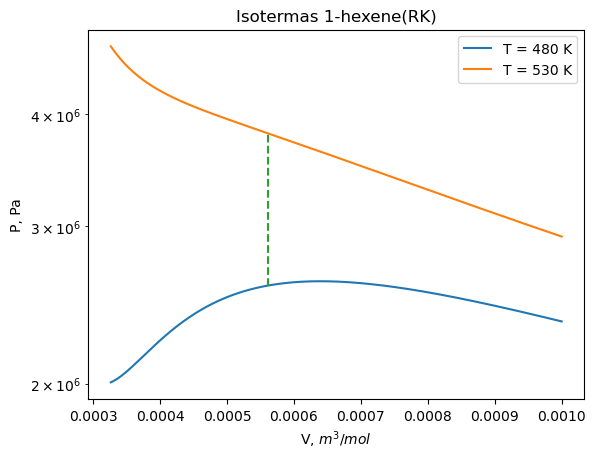

In [19]:
Vej = 1e-3/(150/M)
T1 = 480
T2 = 530
print('V = ','%.6f'%Vej,'m^3/mol')
P1 = PRK(TC,PC,Vej,T1)
P2 = PRK(TC,PC,Vej,T2)
print('Presión inicial:','%.2f' %(P1/1e5),'bar')
print('Presión final:','%.2f' %(P2/1e5),'bar')
print('Cambio de presión:','%.2f' %((P2-P1)/1e5),'bar')
plt.semilogy(V, PRK(TC,PC,V,T1), label="T = "+str(T1)+' K')
plt.semilogy(V, PRK(TC,PC,V,T2), label="T = "+str(T2)+' K')
plt.semilogy([Vej,Vej],[P1,P2],'--')
plt.xlabel('V, $m^3/mol$')
plt.ylabel('P, Pa')
plt.title('Isotermas '+sustancia+'(RK)')
plt.legend()
plt.show()

In [20]:
#RK
print('\nRK')
VRKc1 = VRK(TC,PC,P1,T1)
VRKc2 = VRK(TC,PC,P1,T2)
print('T =',str(T1),'-> Raíces del polinomio:',VRKc1)
print('La solución real es la primera. V =','%.6f'%np.real(VRKc1[0]),'m3/mol')
print('T =',str(T2),'-> Raíces del polinomio:',VRKc2)
print('La solución real es la primera. V =','%.6f'%np.real(VRKc2[0]),'m3/mol')
#SRK
print('\nSRK')
VSRKc1 = VSRK(TC,PC,FA,P1,T1)
VSRKc2 = VSRK(TC,PC,FA,P1,T2)
print('T =',str(T1),'-> Raíces del polinomio:',VSRKc1)
print('La solución real es la primera. V =','%.6f'%np.real(VSRKc1[0]),'m3/mol')
print('T =',str(T2),'-> Raíces del polinomio:',VSRKc2)
print('La solución real es la primera. V =','%.6f'%np.real(VSRKc2[0]),'m3/mol')
#PR
print('\nPR')
VPRc1 = VPR(TC,PC,FA,P1,T1)
VPRc2 = VPR(TC,PC,FA,P1,T2)
print('T =',str(T1),'-> Raíces del polinomio:',VPRc1)
print('La solución real es la primera. V =','%.6f'%np.real(VPRc1[0]),'m3/mol')
print('T =',str(T2),'-> Raíces del polinomio:',VPRc2)
print('La solución real es la primera. V =','%.6f'%np.real(VPRc2[0]),'m3/mol')


RK
T = 480 -> Raíces del polinomio: [0.0008956 +0.00000000e+00j 0.00032741+6.90166803e-05j
 0.00032741-6.90166803e-05j]
La solución real es la primera. V = 0.000896 m3/mol
T = 530 -> Raíces del polinomio: [0.00116847+0.j         0.00027173+0.00012782j 0.00027173-0.00012782j]
La solución real es la primera. V = 0.001168 m3/mol

SRK
T = 480 -> Raíces del polinomio: [0.0006654 +0.00025952j 0.0006654 -0.00025952j 0.00021962+0.j        ]
La solución real es la primera. V = 0.000665 m3/mol
T = 530 -> Raíces del polinomio: [0.00128549+0.j         0.00021322+0.00016533j 0.00021322-0.00016533j]
La solución real es la primera. V = 0.001285 m3/mol

PR
T = 480 -> Raíces del polinomio: [0.00062651+0.0002522j 0.00062651-0.0002522j 0.00019585+0.j       ]
La solución real es la primera. V = 0.000627 m3/mol
T = 530 -> Raíces del polinomio: [0.00123998+0.j       0.0001852 +0.000155j 0.0001852 -0.000155j]
La solución real es la primera. V = 0.001240 m3/mol


In [21]:
#Temperatura de la isoterma (Por debajo de Tc, Eq. líquido-vapor):
from scipy.optimize import fsolve
#Datos Antoine 2-Methylpentane: 200-450 K 
## PORQUE ESE RANGO DE Tº??
# P (bar->Pa) T (K)
CritPoint = [TC, PC, FA, M]
## CUÁLES SON LOS VALORES DE An??
An = k12
def Pv(An, T):
    """
    Parameters
    ----------
    An : array, required
        Array with 3 Antoine parameters [A,B,C].
    T : array, required. Can be a value or an array
        Temperature, K.

    Returns
    -------
    Pv : 
        Vapour pressure, K. If T is an array, returns an array of Pv

    """
    Pv = 10**(An[0]-An[1]/(T+An[2]))
    return Pv


## Isotermas:Van der waals

Ecuaciones de dos parámetros: van der Waals y Redlich-Kwong

Una ecuación de estado para un fluido real debe ser al menos cúbica con respecto al volumen para representar adecuadamente las curvas presión-volumen en la región subcrítica. Se considerarán en primer lugar, los modelos más sencillos y representativos, de dos parámetros: la ecuación de estado de van der Waals (VW), por razones históricas, y la ecuación de estado de Redlich-Kwong (RK), por la bondad de sus resultados: 




en ambas ecuaciones los parámetros $a$ y $b$ son característicos de la naturaleza de la sustancia.



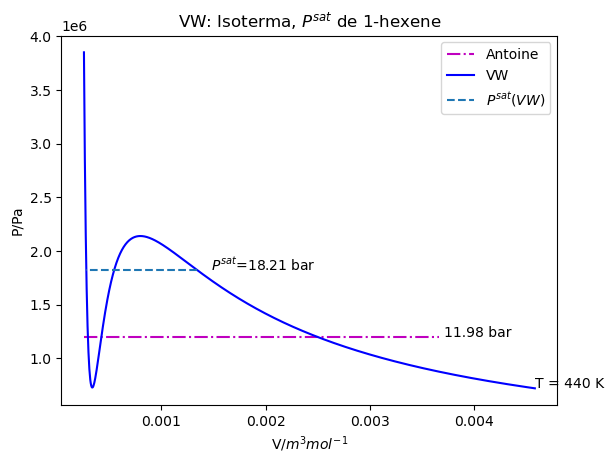

In [23]:
# Dentro de CritPoint está el factor acéntrico, temperatura...
T=440
R=8.314
def VW(T, CritPoint=CritPoint, P=0, V=0):
    """
    Parameters
    ----------
    T : Temperature, real, required
        DESCRIPTION. The value of T (K).
    CritPoint : TYPE, required
        Substance parameters [TC,PC,FA,M]
    P : array, optional
        Pressure, Pa. The default is 0, if this value is known, the 3 values of 
        V are calculated 
    V : array, optional
        Molar volume, m3/mol. The default is 0, if this value is known, 
        the P is calculated
        

    Returns
    -------
    array
        Returns V(m3/mol) or P(Pa) calculate with VW equation.

    """
#Para P=0

    [TC, PC] = CritPoint[0:2]
    a = 27/64*(R*TC)**2/PC
    b = 1/8*R*TC/PC
    if P == 0:
        if V.all == 0 :
            print('Debe especificar P o V')
            return
        else:
            PVW = R*T/(V-b)-a/V**2
            return PVW
    else:
        VVW = np.roots([P,-(b*P+R*T),a,-a*b])
        return VVW
    
# Límites representación Pmax y Vmax
## ELEGIMOS LOS LÍMITES QUE QUERAMOS DE PMAX Y VMAX??
Pmax = 1.2*PC
Vmax = 1.5*R*T/Pv(An,T)
# Cálculo del Vmin a partir de Pmax y conversión a real. El menor valor es Vmin
Vmin = VW(T,P=Pmax)
# La solución real es la correcta: busca la parte real con la imaginaria nula
[Vmin] = [v.real for v in Vmin if (v.imag==0)]  # [Vmin] para transformar el array en un valor real
#Nos da el V real de V en Vmin para el que la parte imaginaria es cero
# Calcula valores de la isoterma para representar
V_graf = np.linspace(Vmin,Vmax,1000)
P_graf = VW(T,V=V_graf)

# Se calcula la presión de saturación por tanteos
# buscar el valor de Psat con VW 
def PsatVW(T):
    """
    Parameters
    ----------
    T : temperature, K

    Returns
    -------
    Psat (Pa) calculate with VW equation
    """
    a = 27/64*(R*TC)**2/PC
    b = 1/8*R*TC/PC
    def PsatVW0(P):
        # si P es negativo, P=1e-5
        if not type(P)==float:
            P = P[0]
        if P<0:
            P = 1e-5
        VL = min(VW(T, P=P))
        VV = max(VW(T, P=P))
        err = 𝑃*(𝑉𝑉-𝑉𝐿)-𝑅*𝑇*np.log((𝑉𝑉-𝑏)/(𝑉𝐿-𝑏))-(𝑎/𝑉𝑉-𝑎/𝑉𝐿)
        return err
    Vextr = np.roots(np.array([R*T,-2*a,4*a*b,-2*a*b**2]))
    Vmax = Vextr[0]
    Vmin = Vextr[1]
    Pmax = VW(T, CritPoint, V=Vmax)
    Pmin = VW(T, CritPoint, V=Vmin)
    if Pmin < 0:
        Pmin = 1e-3
    PsatVW = fsolve(PsatVW0,(Pmin+Pmax)/2)
    if not type(PsatVW)==float:
        PsatVW = PsatVW[0]
    return PsatVW

Psat=PsatVW(T)
# Calcula las tres soluciones para V a Psat
Vsat3=VW(P=Psat,T=T)
# Representación de la línea de la Pv
Pv_An = Pv(An,T)
plt.plot([V_graf[0],0.8*Vmax],[Pv_An,Pv_An],'-.m',label='Antoine') 
#El 0.8 es aleatorio si pones 0.85 queda más a la derecha
plt.text(0.81*Vmax,Pv(An,T),"%.2f"%(Pv_An/1e5)+' bar')
# Representación de la isoterma
plt.plot(V_graf,P_graf,'b',label='VW')
plt.text(Vmax,P_graf[-1],'T = '+str(T)+' K')
plt.text(Vsat3[0]*1.1,Psat,'$P^{sat}$='+"%.2f"%(Psat/1e5)+' bar')
plt.plot([Vsat3[0],Vsat3[2]],[Psat,Psat],'--',label='$P^{sat}(VW)$')
plt.xlabel('V/$m^3 mol^{-1}$')
plt.ylabel('P/Pa')
plt.title('VW: Isoterma, $P^{sat}$ de '+sustancia)
plt.legend()
plt.show()

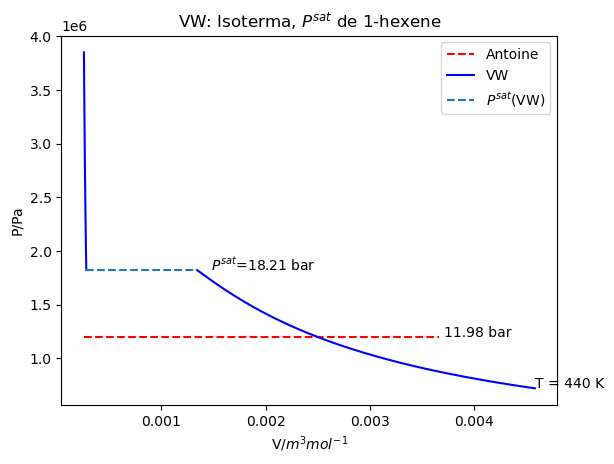

In [24]:
#Por encima de la presión de saturación tenemos fase líquida, por debajo fase vapor.
#Se quita parte de la curva porque no tiene sentido físico
# Calcula valores de la isoterma para representar
VL = min(Vsat3)
VV = max(Vsat3)
#Línea que vaya de Volumen Mínimo hasta el volumen del líquido (1º Línea, la de la izquierda)
V_graf1 = np.linspace(Vmin,VL,100) 
#Línea que vaya del Volumen del vapor al volumen máximo (2ºLínea, la de la derecha)
V_graf2 = np.linspace(VV,Vmax,500)
P_graf1 = VW(T, V=V_graf1)
P_graf2 = VW(T, V=V_graf2)
Pv_An = Pv(An,T)
# Representación de la línea de la Pv
plt.plot([V_graf[0],0.8*Vmax],[Pv_An,Pv_An],'--r',label='Antoine')
plt.text(0.81*Vmax,Pv_An,"%.2f"%(Pv_An/1e5)+' bar')
# Representación de la isoterma
plt.plot(V_graf1,P_graf1,'b')
plt.plot(V_graf2,P_graf2,'b',label='VW')
plt.text(Vmax,P_graf[-1],'T = '+str(T)+' K')
plt.plot([VL,VV],[Psat,Psat],'--',label='$P^{sat}$(VW)')
plt.text(VV*1.1,Psat,'$P^{sat}$='+"%.2f"%(Psat/1e5)+' bar')
plt.xlabel('V/$m^3 mol^{-1}$')
plt.ylabel('P/Pa')
plt.title('VW: Isoterma, $P^{sat}$ de '+sustancia)
plt.legend()
plt.show()

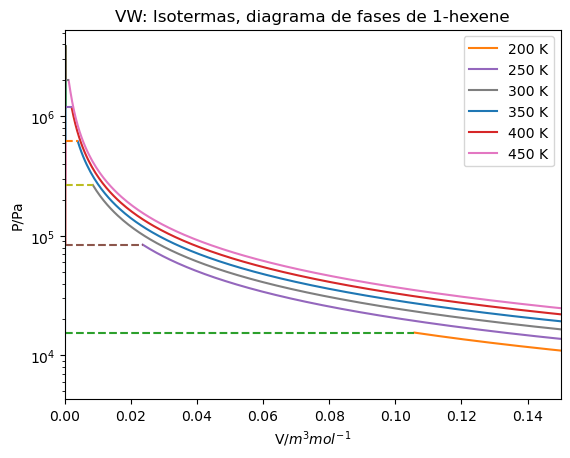

In [25]:
Temp=[200,250,300,350,400,450]
TC=504.000
PC = 3.210/ 1e-6  
# Límites representación Pmax y Vmax
Pmax=1.2*PC
Vmax=0.01*0.5*R*Temp[0]/Pv(An,Temp[0])
plt.figure(1)
for Ti in Temp:
    # Cálculo del Vmin a partir de Pmax y conversión a real. El menor valor es Vmin
    Vmin = VW(T=Ti, P=Pmax)
    # La solución real es la correcta: busca la parte real con la imaginaria nula
    [Vmin] = [v.real for v in Vmin if (v.imag==0)]
    # Calcula valores de la isoterma para representar
    Psati = PsatVW(T=Ti)
    # Calcula las tres soluciones para V a Psat
    Vsat3 = VW(T=Ti,P=Psati)
    VL = min(Vsat3)
    VV = max(Vsat3)
    V_graf1 = np.linspace(Vmin,VL,100)
    V_graf2 = np.linspace(VV,Vmax,500)
    P_graf1 = VW(T=Ti,V=V_graf1)
    P_graf2 = VW(T=Ti,V=V_graf2)
    # Representación de la isoterma
    # Ponemos plt.semilogy para poner escala logarítmica, ya que hay presiones muy altas
    plt.semilogy(V_graf1,P_graf1)
    plt.plot(V_graf2,P_graf2,label=str(Ti)+' K')
    # plt.text(Vmax,P_graf2[-1],'T = '+str(Ti)+' K')
    plt.plot([VL,VV],[Psati,Psati],'--')
plt.xlabel('V/$m^3 mol^{-1}$')
plt.ylabel('P/Pa')
plt.title('VW: Isotermas, diagrama de fases de '+sustancia)
plt.legend()
plt.xlim(0, 0.15)
plt.show()


## Isotermas: Redlich-kwong

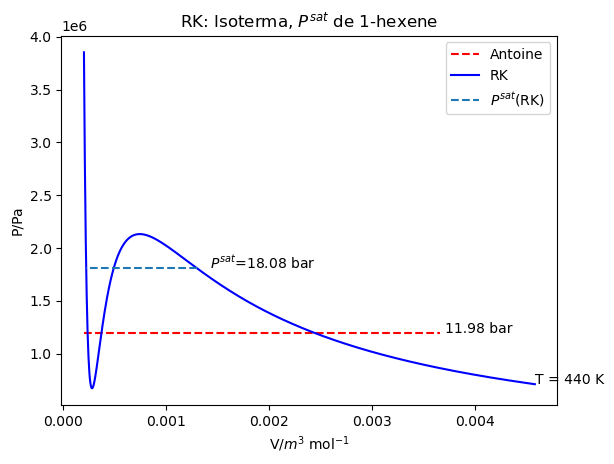

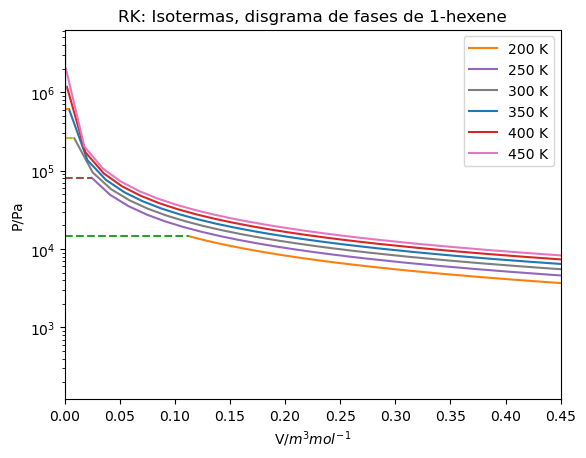

,T (K),Psat (Pa),VL,VV
0,200,1.457e+04,1.376e-04,1.128e-01
1,250,8.093e+04,1.471e-04,2.463e-02
2,300,2.585e+05,1.590e-04,8.755e-03
3,350,6.056e+05,1.751e-04,4.008e-03
4,400,1.171e+06,1.983e-04,2.098e-03
5,450,1.995e+06,2.374e-04,1.154e-03


In [28]:
def RK(T,CritPoint=CritPoint,P=0,V=0):
    """
    Parameters
    ----------
    T : TYPE, required
        Temperature
    CritPoint : TYPE,Optional
                [TC,PC,FA]
    P : TYPE, optional
        Pressure, Pa. The default is 0, if this value is known, the 3 values of
        V are calculated
    V : TYPE, optional
        The default is 0, if this value is known, the P is calculated

    Returns
    -------
    TYPE
        Returns V(m3/mol) or P(Pa) calculate with RK equation.

    """

    [TC, PC] = CritPoint[0:2]
    alfa = (T/TC)**0.5
    a = 0.42748*alfa*(R*TC)**2/(T/TC)**0.5/PC
    b = 0.08664*R*TC/PC
    if P==0:
        PRK=R*T/(V-b)-a/V/(V+b)
        return PRK
    else:
        VRK = np.roots([P,-R*T,a-b**2*P-R*T*b,-a*b])
        return VRK

# Límites representación Pmax y Vmax
Pmax = 1.2*PC
Vmax = 1.5*R*T/Pv(An,T)
# Cálculo del Vmin a partir de Pmax y conversión a real. El menor valor es Vmin
# La solución real es la correcta: busca la parte real con la imaginaria nula
[Vmin] = [v.real for v in RK(T,P=Pmax) if (v.imag==0)]
# Calcula valores de la isoterma para representar
V_graf = np.linspace(Vmin,Vmax,1000)
P_graf = RK(T,V=V_graf)

# buscar el valor de Psat con RK


def PsatRK(T, CritPoint=CritPoint):
    """
    Parameters
    ----------
    T : TYPE, required
        Temperature
    CritPoint : TYPE,Optional
                [TC,PC,FA]

    Returns
    -------
    Psat (Pa) calculate with RK equation
    """

    [TC, PC] = CritPoint[0:2]
    alfa = (T/TC)**0.5
    a = 0.42748*alfa*(R*TC)**2/(T/TC)**0.5/PC
    b = 0.08664*R*TC/PC

    def PsatRK0(P):
        # si P es negativo, P=1e-5
        if not type(P) == float:
            P = P[0]
        if P < 0:
            P = 1e-5
        V_fases = RK(T, P=P)
        VL = min(V_fases)
        VV = max(V_fases)
        err = P*(VV-VL)-R*T*np.log((VV-b)/(VL-b))+a/b*np.log(VV*(VL+b)/VL/(VV+b))
        if err.imag == 0:
            return err
        else:
            return 1e3

    # De las soluciones de dP/dV=0, las dos primeras corresponden al mín. y max
    Vextr = np.roots(np.array([R*T, 2*R*T*b-2*a, 3*a*b+R*T*b**2, 0, -a*b**3]))[0:2]
    # Calcula la presión en Vextr y si en el mín. es negativa, la hace 1e-5
    Pextr = [p if p > 0 else 1e-5 for p in RK(T, V=Vextr)]
    [PsatRK] = fsolve(PsatRK0, sum(Pextr)/2)
    # Los corchetes para que devuelva una variable tipo float
    return PsatRK

Psat = PsatRK(T)
# Calcula las tres soluciones para V a Psat
Vsat3 = RK(T,P=Psat)
# Representación de la línea de la Pv
Pv_An = Pv(An,T)
plt.plot([V_graf[0],0.8*Vmax],[Pv_An,Pv_An],'--r',label='Antoine')
plt.text(0.81*Vmax,Pv_An,"%.2f"%(Pv_An/1e5)+' bar')
# Representación de la isoterma
plt.plot(V_graf,P_graf,'b',label='RK')
plt.text(Vmax,P_graf[-1],'T = '+str(T)+' K')
plt.plot([Vsat3[0],Vsat3[2]],[Psat,Psat],'--',label='$P^{sat}$(RK)')
plt.text(Vsat3[0]*1.1,Psat,'$P^{sat}$='+"%.2f"%(Psat/1e5)+' bar')
plt.xlabel('V/$m^3$ mol$^{-1}$')
plt.ylabel('P/Pa')
plt.title('RK: Isoterma, $P^{sat}$ de '+sustancia)
plt.legend()
plt.show()
print('')
Temp = [200,250,300,350,400,450]

# Límites representación Pmax y Vmax
Pmax = 1.2*PC
Vmax = 0.15*R*Temp[0]/Pv(An,Temp[0])
data = {
    'T (K)': [],
    'Psat (Pa)': [],
    'VL': [],
    'VV': []
}

for Ti in Temp:
    # Cálculo del Vmin a partir de Pmax y conversión a real. El menor valor es Vmin
    Vmin = RK(Ti, P=Pmax)
    # La solución real es la correcta: busca la parte real con la imaginaria nula
    Vmin = [v.real for v in Vmin if (v.imag==0)]
    Vmin = Vmin[0]
    # Calcula valores de la isoterma para representar
    Psati = PsatRK(Ti)
    # print('T=',Ti,'Psat=','%.0f'%Psati,'Pa')
    # Calcula las tres soluciones para V a Psat
    Vsat3 = RK(Ti, P=Psati)
    VL = min(Vsat3)
    VV = max(Vsat3)
    data['T (K)'].append(Ti)
    data['Psat (Pa)'].append(Psati)
    data['VL'].append(VL)
    data['VV'].append(VV)

    # print('VL=','%.4e'%VL,'VV=','%.4e'%VV)
    V_graf1 = np.linspace(Vmin,VL,100)
    V_graf2 = np.linspace(VV,Vmax,500)
    P_graf1 = RK(Ti,V=V_graf1)
    P_graf2 = RK(Ti,V=V_graf2)
    # Representación de la isoterma
    
    plt.semilogy(V_graf1,P_graf1)
    plt.plot(V_graf2,P_graf2,label=str(Ti)+' K')
    plt.plot([VL,VV],[Psati,Psati],'--')
plt.xlabel('V/$m^3 mol^{-1}$')
plt.ylabel('P/Pa')
plt.title('RK: Isotermas, disgrama de fases de '+sustancia)
plt.legend()
plt.xlim(0, 0.45)
plt.show()
print('')
df = pd.DataFrame(data)
display(df)

## Isotermas: Soave-Redlich-kwong

In [ ]:
from scipy.optimize import fsolve

def SRK(T,CritPoint=CritPoint,P=0,V=0):
    """
    Parameters
    ----------
    T : TYPE, required
        Temperature
    CritPoint : TYPE,Optional
                [TC,PC,FA]
    P : TYPE, optional
        Pressure, Pa. The default is 0, if this value is known, the 3 values of
        V are calculated
    V : TYPE, optional
        DESCRIPTION. The default is 0, if this value is known, the P is calculated

    Returns
    -------
    TYPE
        Returns V(m3/mol) or P(Pa) calculate with SRK equation.

    """
    b=0.08664*R*TC/PC
    m=0.48+1.574*FA-0.176*FA**2
    alfa=(1+m*(1-(T/TC)**0.5))**2
    a=0.42747*alfa*R**2*TC**2/PC
    if P==0:
        PSRK=R*T/(V-b)-a/V/(V+b)
        return PSRK
    else:
        VSRK=np.roots([P,-R*T,a-b**2*P-R*T*b,-a*b])
        return VSRK

# Límites representación Pmax y Vmax
Pmax=1.2*PC
Vmax=1.5*R*T/Pv(An,T)
# Cálculo del Vmin a partir de Pmax y conversión a real. El menor valor es Vmin
# La solución real es la correcta: busca la parte real con la imaginaria nula
[Vmin]=[v.real for v in SRK(T,P=Pmax) if (v.imag==0)]
# Calcula valores de la isoterma para representar
V_graf=np.linspace(Vmin,Vmax,1000)
P_graf=SRK(T,V=V_graf)

# buscar el valor de Psat con SRK


def PsatSRK(T, TC=TC, PC=PC):
    """
    Parameters
    ----------
    T : temperature, K

    Returns
    -------
    Psat (Pa) calculate with SRK equation
    """
    b=0.08664*R*TC/PC
    m=0.48+1.574*FA-0.176*FA**2
    alfa=(1+m*(1-(T/TC)**0.5))**2
    a=0.42747*alfa*R**2*TC**2/PC

    def PsatSRK0(P):
        # si P es negativo, P=1e-5
        if not type(P) == float:
            P = P[0]
        if P < 0:
            P = 1e-5
        V_fases = SRK(T,P=P)
        VL = min(V_fases)
        VV = max(V_fases)
        err = P*(VV-VL)-R*T*np.log((VV-b)/(VL-b))+a/b*np.log(VV*(VL+b)/VL/(VV+b))
        if err.imag == 0:
            return err
        else:
            return 1e3

    # De las soluciones de dP/dV=0, las dos primeras corresponden al mín. y max.
    Vextr = np.roots(np.array([R*T, 2*R*T*b-2*a, 3*a*b+R*T*b**2, 0, -a*b**3]))[0:2]
    Pextr = [p if p > 0 else 1e-5 for p in SRK(T, V=Vextr)]
    [PsatSRK] = fsolve(PsatSRK0, sum(Pextr)/2)
    return PsatSRK


Psat=PsatSRK(T=T)
# Calcula las tres soluciones para V a Psat
Vsat3=SRK(P=Psat,T=T)
# Representación de la línea de la Pv
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)

Pv_An = Pv(An,T)
ax1.plot([V_graf[0],0.8*Vmax],[Pv_An,Pv_An],'--r',label='Antoine')
plt.text(0.81*Vmax,Pv_An,"%.2f"%(Pv_An/1e5)+' bar')

# Representación de la isoterma
ax1.plot(V_graf,P_graf,'b',label='SRK')
ax1.text(Vmax,P_graf[-1],'T = '+str(T)+' K')
ax1.plot([Vsat3[0],Vsat3[2]],[Psat,Psat],'--',label='Psat SRK')
plt.text(Vsat3[0],Psat*1.1,'$P^{sat}$='+'%.2f'%(Psat/1e5)+' bar')
ax1.set_xlabel('V/$m^3 mol^{-1}$')
ax1.set_ylabel('P/Pa')
plt.title('SRK: Isoterma('+'%.2f'%T+'K), diagrama de fases de '+sustancia)
ax1.legend()
ax1.set_ylim([0, 1.1*P_graf[0]])
plt.show()

Temp=np.array([200,250,300,350,400,450])
# Límites representación Pmax y Vmax
Pmax=1.2*PC
Vmax=1.2*R*Temp[0]/Pv(An,Temp[0])
plt.figure(1)
for Ti in Temp:
    # Cálculo del Vmin a partir de Pmax y conversión a real. El menor valor es Vmin
    Vmin=SRK(P=Pmax,T=Ti)
    # La solución real es la correcta: busca la parte real con la imaginaria nula
    Vmin=[v.real for v in Vmin if (v.imag==0)]
    Vmin=Vmin[0]
    # Calcula valores de la isoterma para representar
    Psati=PsatSRK(T=Ti)
    # Calcula las tres soluciones para V a Psat
    Vsat3=SRK(P=Psati,T=Ti)
    VL=min(Vsat3)
    VV=max(Vsat3)
    V_graf1=np.linspace(Vmin,VL,100)
    V_graf2=np.linspace(VV,Vmax,500)
    P_graf1=SRK(V=V_graf1,T=Ti)
    P_graf2=SRK(V=V_graf2,T=Ti)
    # Representación de la isoterma
    plt.semilogy(V_graf1,P_graf1)
    plt.plot(V_graf2,P_graf2,label=str(Ti)+' K')
    plt.plot([VL,VV],[Psati,Psati],'--')
plt.xlabel('V/$m^3 mol^{-1}$')
plt.ylabel('P/Pa')
plt.title('SRK: Isotermas, diagrama de fases de '+sustancia)
plt.legend()
plt.show()

## Isotermas: Peng-Robinson

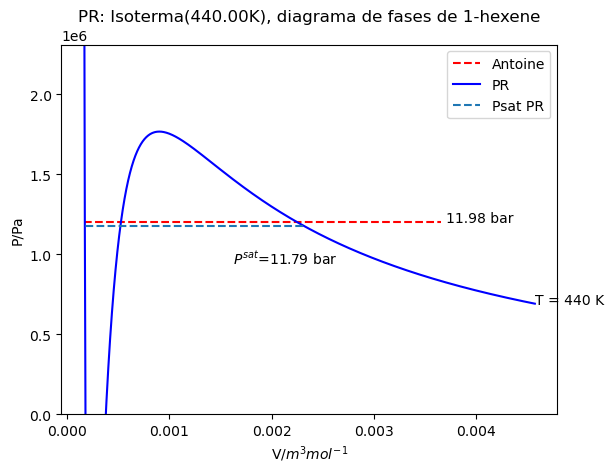

In [26]:
from matplotlib.pyplot import cm # importa más colores

def PR(T,CritPoint=CritPoint,P=0,V=0):
    """
    Parameters
    ----------
    T : TYPE, required
        Temperature
    CritPoint : TYPE,Optional
                [TC,PC,FA]
    P : TYPE, optional
        Pressure, Pa. The default is 0, if this value is known, the 3 values of
        V are calculated
    V : TYPE, optional
        DESCRIPTION. The default is 0, if this value is known, the P is calculated

    Returns
    -------
    TYPE
        Returns V(m3/mol) or P(Pa) calculate with PR equation.

    """
    # Values of https://en.wikipedia.org/wiki/Cubic_equations_of_state
    ZC=1/32*(11-2*7**0.5*np.sinh(1/3*np.arcsinh(13/7/7**0.5)))
    bb=1/3*(8**0.5*np.sinh(1/3*np.arcsinh(8**0.5))-1)*ZC
    b=bb*R*TC/PC
    m=0.37464+1.54226*FA-0.26992*FA**2
    alfa=(1+m*(1-(T/TC)**0.5))**2
    aa=8/3/(1+np.cosh(1/3*np.arccosh(3)))*ZC**3/bb
    a=aa*alfa*R**2*TC**2/PC
    if P == 0:
        PPR=R*T/(V-b)-a/(V*(V+b)+b*(V-b))
        return PPR
    else:
        return np.roots([P,P*b-R*T,a-3*P*b**2-2*R*T*b,b**3*P+b**2*R*T-a*b])


# Límites representación Pmax y Vmax
Pmax=1.2*PC
Vmax=1.5*R*T/Pv(An,T)
# Cálculo del Vmin a partir de Pmax y conversión a real. El menor valor es Vmin
# La solución real es la correcta: busca la parte real con la imaginaria nula
[Vmin]=[v.real for v in PR(T,P=Pmax) if (v.imag==0)]
# Calcula valores de la isoterma para representar
V_graf=np.linspace(Vmin,Vmax,1000) # Vmin[0] para tomar un valor type float
P_graf=PR(T,V=V_graf)

# buscar el valor de Psat con PR
def PsatPR(T,TC=TC,PC=PC):
    """
    Parameters
    ----------
    T : temperature, K

    Returns
    -------
    Psat (Pa) calculated with PR equation
    """
    ZC=1/32*(11-2*7**0.5*np.sinh(1/3*np.arcsinh(13/7/7**0.5)))
    bb=1/3*(8**0.5*np.sinh(1/3*np.arcsinh(8**0.5))-1)*ZC
    b=bb*R*TC/PC
    m=0.37464+1.54226*FA-0.26992*FA**2
    alfa=(1+m*(1-(T/TC)**0.5))**2
    aa=8/3/(1+np.cosh(1/3*np.arccosh(3)))*ZC**3/bb
    a=aa*alfa*R**2*TC**2/PC

    def PsatPR0(P):
        # si P es negativo, P=1e-5
        if not type(P)==float:
            P = P[0]
        if P<0:
            P=1e-5
        V_fases=PR(T,P=P)
        VL = min(V_fases)
        VV = max(V_fases)
        b1=-b*(1-2**0.5)
        b2=-b*(1+2**0.5)
        err=P*(VV-VL)-R*T*np.log((VV-b)/(VL-b))+a/2**1.5/b*np.log((VV-b1)*(VL-b2)/(VL-b1)/(VV-b2))
        if err.imag==0:
            return err
        else:
            return 1e3

    Vextr=np.roots(np.array([R*T,4*b*R*T-2*a,2*b**2*R*T+2*a*b,2*a*b**2-4*b**3*R*T,b**4*R*T-2*a*b**3]))
    Vextr[::-1].sort() # Es necesario ordenar las raíces de mayor a menor
    Pextr = [p if p > 0 else 1e-5 for p in PR(T, V=Vextr[0:2])]
    [PsatPR]=fsolve(PsatPR0,sum(Pextr)/2) # [ ] Para evitar que la salida sea un array
    return PsatPR

Psat=PsatPR(T=T)
# Calcula las tres soluciones para V a Psat
Vsat3=PR(T,P=Psat)
# Representación de la línea de la Pv
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
Pv_An = Pv(An,T)
ax1.plot([V_graf[0],0.8*Vmax],[Pv_An,Pv_An],'--r',label='Antoine')
plt.text(0.81*Vmax,Pv(An,T),"%.2f"%(Pv_An/1e5)+' bar')

# Representación de la isoterma
ax1.plot(V_graf,P_graf,'b',label='PR')
ax1.text(Vmax,P_graf[-1],'T = '+str(T)+' K')
ax1.plot([Vsat3[0],Vsat3[2]],[Psat,Psat],'--',label='Psat PR')
plt.text(Vsat3[0]*0.7,Psat*0.8,'$P^{sat}$='+"%.2f"%(Psat/1e5)+' bar')
ax1.set_xlabel('V/$m^3 mol^{-1}$')
ax1.set_ylabel('P/Pa')
plt.title('PR: Isoterma('+'%.2f'%T+'K), diagrama de fases de '+sustancia)
ax1.legend()
ax1.set_ylim([0, 0.6*P_graf[0]]) # para ampliar la zona de ELV
plt.show()

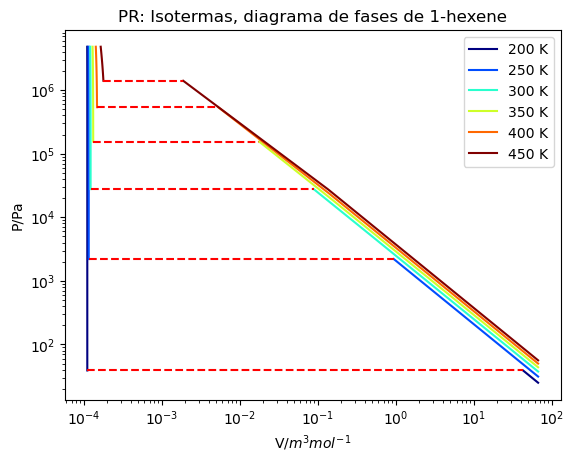

,Temp,Psat(Antoine),Psat(PR)
0,200,2.996e+01,3.891e+01
1,250,1.867e+03,2.202e+03
2,300,2.489e+04,2.775e+04
3,350,1.469e+05,1.549e+05
4,400,5.352e+05,5.387e+05
5,450,1.431e+06,1.403e+06


In [27]:
import pandas as pd

# Inicializa listas para almacenar resultados
data = {'Temp': [], 'Psat(Antoine)': [], 'Psat(PR)': []}

Temp = [200, 250, 300, 350, 400, 450]

# Límites representación Pmax y Vmax
Pmax = 1.5 * PC
Vmax = 1.2 * R * Temp[0] / Pv(An, Temp[0])

# Crea el iterador de colores fuera del bucle
color_iter = iter(cm.jet(np.linspace(0, 1, len(Temp))))

plt.figure(1)
for Ti in Temp:
    # Cálculo del Vmin a partir de Pmax y conversión a real. El menor valor es Vmin
    Vmin = PR(P=Pmax, T=Ti)
    # La solución real es la correcta: busca la parte real con la imaginaria nula
    Vmin = [v.real for v in Vmin if (v.imag == 0)]
    Vmin = Vmin[0]
    # Calcula valores de la isoterma para representar
    Psati = PsatPR(T=Ti)
    # Almacena resultados en listas
    data['Temp'].append(Ti)
    data['Psat(Antoine)'].append(Pv(An, Ti))
    data['Psat(PR)'].append(Psati)
    # Calcula las tres soluciones para V a Psat
    Vsat3 = PR(P=Psati, T=Ti)
    VL = min(Vsat3)
    VV = max(Vsat3)
    V_graf1 = np.linspace(Vmin, VL, 100)
    V_graf2 = np.linspace(VV, Vmax, 500)
    P_graf1 = PR(V=V_graf1, T=Ti)
    P_graf2 = PR(V=V_graf2, T=Ti)
    # Representación de la isoterma
    c = next(color_iter)
    plt.loglog(V_graf1, P_graf1, c=c)
    plt.plot(V_graf2, P_graf2, c=c, label=str(Ti) + ' K')
    plt.plot([VL, VV], [Psati, Psati], '--r')

# Crea DataFrame a partir de los resultados
df = pd.DataFrame(data)

# Muestra la leyenda fuera del bucle
plt.legend()
plt.xlabel('V/$m^3 mol^{-1}$')
plt.ylabel('P/Pa')
plt.title('PR: Isotermas, diagrama de fases de ' + sustancia)
plt.show()
display(df)

# Propiedades Residuales


In [34]:
import numpy as np
import pandas as pd
from TQA_EE import R

# Condiciones: presión, Pa, y temperatura, K
AB = np.array([-2.077e+01, -8.722e+02, -2.728e+03, -4.444e+03, -4.436e+03])
P = 4e6
T = 500

# Cálculo del volumen molar como gas ideal
VIG = R * T / P

# Cálculo de B y dBdT
B = np.polyval(AB, 298.15 / T - 1) * 1e-6
dBdT = np.polyval(np.polyder(AB) * (-298.15 * T**-2), 298.15 / T - 1) * 1e-6

# Estimación de B(BE) y dBdT(dBdTE)
B0 = 0.083 - 0.422 / (T / TC) ** 1.6
B1 = 0.139 - 0.172 / (T / TC) ** 4.2
BE = (B0 + FA * B1) * (R * TC / PC)
dBdTE = (
    0.6752 * TC**1.6 / T**2.6
    + FA * 0.7224 * TC**4.2 / T**5.2
) * (R * TC / PC)

# Cálculo del volumen molar
VV = R * T / P + B
VVE = R * T / P + BE

# Cálculo del factor de compresibilidad
ZV = R * T / (P * VV)
ZVE = R * T / (P * VVE)

# Cálculo entalpía y energía de Gibbs residual
HRV = (B - T * dBdT) * P
GRV = B * P
HRVE = (BE - T * dBdTE) * P
GRVE = BE * P  # EE van der Waals.

# Cálculo del volumen molar y factor de compresibilidad
from TQA_EE import VW, abVW

[a, b] = abVW(T, CritPoint)
VVW = VW(T=T, P=P, CritPoint=CritPoint)
[VVW] = [v.real for v in VVW if (v.imag == 0)]
Z = P * VVW / (R * T)

# Cálculo entalpía y energía de Gibbs residual
GRVW = R * T * (
    Z
    - np.log(Z)
    - 1
    - np.log(1 - b / VVW)
    - a / (R * T * VVW)
)
HRVW = R * T * (Z - 1) - a / VVW

# ... (otros cálculos similares)

# Mostrar resultados en un DataFrame de pandas
resultados_dict = {
    "Estado": [
        "Virial",
        "Vir.est",
        "VW",
        "RK",
        "SRK",
        "PR",
    ],
    "Volumen molar": [VV, VVE, VVW, VRK, VSRK, VPR],
    "H residual": [HRV, HRVE, HRVW, HRRK, HRSRK, HRPR],
    "G residual": [GRV, GRVE, GRVW, GRRK, GRSRK, GRPR],
}

resultados_df = pd.DataFrame(resultados_dict)

# Mostrar el DataFrame
display(resultados_df)


,Estado,Volumen molar,H residual,G residual
0,Virial,-1.990e-03,-1.847e+04,-1.212e+04
1,Vir.est,5.755e-04,-6.518e+03,-1.855e+03
2,VW,3.190e-04,-1.012e+04,-2.227e+03
3,RK,2.629e-04,-1.425e+04,-2.481e+03
4,SRK,2.606e-04,-1.738e+04,-2.505e+03
5,PR,2.346e-04,-1.746e+04,-2.673e+03


# Diagrama de mollier

In [ ]:
Como solo tengo un dato de capacidad calorifica para el liquido, he encontrado un articulo donde da un metodo de calculo por la contribucion de subgrupos 

,T,CPL,Coeficientes
0,170.000,27.091,"[8.139871619812185e-18, 1.263312999999997, -187.67259999999965]"
1,180.000,39.724,"[8.139871619812185e-18, 1.263312999999997, -187.67259999999965]"
2,190.000,52.357,"[8.139871619812185e-18, 1.263312999999997, -187.67259999999965]"
3,200.000,64.990,"[8.139871619812185e-18, 1.263312999999997, -187.67259999999965]"
4,210.000,77.623,"[8.139871619812185e-18, 1.263312999999997, -187.67259999999965]"
5,220.000,90.256,"[8.139871619812185e-18, 1.263312999999997, -187.67259999999965]"
6,230.000,102.889,"[8.139871619812185e-18, 1.263312999999997, -187.67259999999965]"
7,250.000,128.156,"[8.139871619812185e-18, 1.263312999999997, -187.67259999999965]"
8,298.150,188.984,"[8.139871619812185e-18, 1.263312999999997, -187.67259999999965]"




error =  -3.101020703764301 %




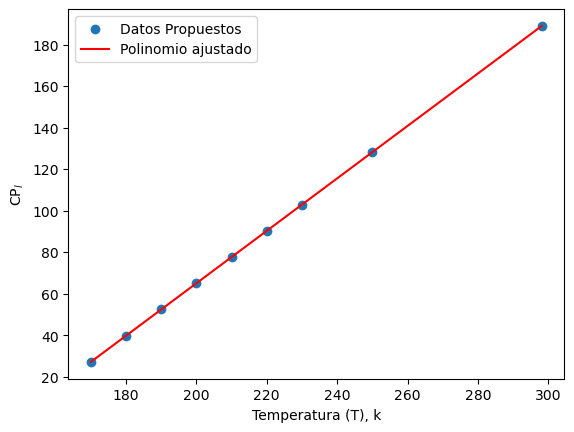

[ 8.13987162e-18  1.26331300e+00 -1.87672600e+02]


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir los coeficientes originales
ACPL = 14.5504 + (3 * 19.539) + (2 * (-130.42))
BCPL = 0.05406 + (3 * 0.038211) + (2 * 0.54731)

# Crear una lista de valores de T
T_values = [170, 180, 190, 200, 210, 220, 230, 250,298.15]

# Inicializar listas para almacenar los valores de T, CPL y coeficientes
T_list = []
CPL_list = []

# Calcular los valores de CPL para cada T y almacenarlos en las listas
for T in T_values:
    CPL = ACPL + T * BCPL
    T_list.append(T)
    CPL_list.append(CPL)

# Convertir las listas a arreglos de NumPy
T_array = np.array(T_list)
CPL_array = np.array(CPL_list)

# Ajustar un polinomio de grado 1 (una línea recta) a los datos
degree = 2
coefficients = np.polyfit(T_array, CPL_array, degree)

# Crear un polinomio a partir de los coeficientes
poly = np.poly1d(coefficients)

# Crear un DataFrame con los valores
data = {
    'T': T_array,
    'CPL': CPL_array,
    'Coeficientes': [coefficients] * len(T_values)
}

df = pd.DataFrame(data)

# Establecer el formato de visualización para los coeficientes
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

# Imprimir el DataFrame
display(df)
print('\n')
print('error = ',(1-CPL_array[-1]/183.30)*100,'%')
print('\n')
# Visualizar los datos y el polinomio ajustado
plt.scatter(T_array, CPL_array, label='Datos Propuestos')
plt.plot(T_array, poly(T_array), label='Polinomio ajustado', color='red')
plt.xlabel('Temperatura (T), k')
plt.ylabel('CP$_l$')
plt.legend()
plt.show()



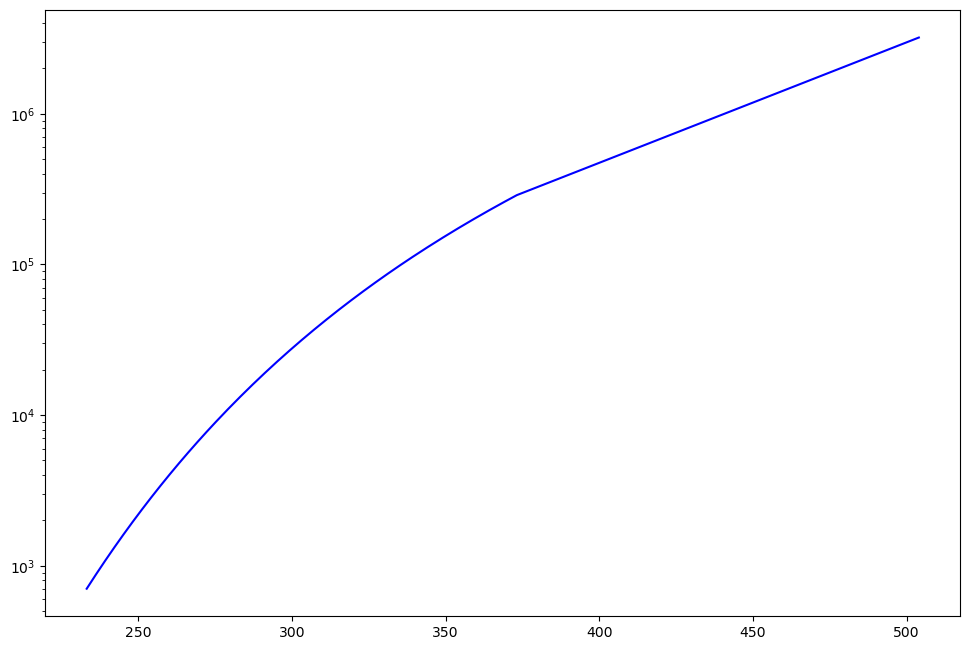

In [56]:
sustancia = '1-hexene'
CAS = '592-41-6'
FA=0.28
M=84.16
CritPoint = [TC, PC, FA, M]
from TQA_EE import PsatPR
from TQA_EE import PR
from TQA_EE import abPR
from TQA_EE import R
import matplotlib.pyplot as plt
import numpy as np
# Peng-Robinson EE
T = np.arange(-40, 101, 1)+273.15
T = np.append(T, TC-0.005)
Psat = np.array([PsatPR(T[i], CritPoint) for i in range(len(T))])
Vsat = [PR(T[i], CritPoint=CritPoint, P=Psat[i]) for i in range(len(T))]
VVsat = np.array([Vsat[i][0] for i in range(len(T))])
VLsat = np.array([Vsat[i][2] for i in range(len(T))])
# An_adj = An(T, Psat)

# El tamaño de la figura se puede controlar, pero hay que pasarlo a pulgadas
plt.subplots(figsize=(30/2.54, 20/2.54))
plt.semilogy(T, Psat, '-b', label='$P^{sat} EE PR$')

# https://www.meiersupply.com/customer/docs/skudocs/Document_Links/Vendors/Chemours/R-134A/Thermodynamics/h47751_hfc134a_thermo_prop_eng.pdf
# Vapour pressure
A = 9.294
C = 1311.688
B = -32.211
Tb = 336.630
DFH0 = -41.95e3
DFG0 = 86.90e3

# Nist
# Reference point for enthalpy and entropy:
hf = -204.3   # kJ/kg at 0 °C
sf = 295.18*1e-3    # kJ/kg·K at 0 °C
# cambiar unidades a SI
Hf = hf*M
Sf = sf*M

Cpig = R*np.array([19.8, 0.07344, -5.602e-5, 1.715e-8])
Cpig = Cpig[::-1]

# Cálculo de las entalpías de saturación, líquido
# https://powderprocess.net/Tools_html/Data_Diagrams/Specific_Heat_Capacity_Liquids.html
# Refrigerant-134a	Specific heat capacity of Refrigerant-134a (kJ/kg.K)
# https://en.wikipedia.org/wiki/1,1,1,2-Tetrafluoroethane_(data_page)  25°C
# Tcpl_data = np.array([298.15, 298.56])
# Cpl_data = np.array([183.30,182.77])
Cpl = coefficients

In [57]:
def Hig(T, DFH0=DFH0, T_R=298.15):
    '''
    Parameters
    ----------
    DFCpig : TYPE float
        Reference formation Enthalpy.
    T : TYPE float, array
        Temperature.
    DFH0 : TYPE, optional
        Entalpy of formation. The default is DFH0.
    T_R : TYPE float, optional
        Reference temperature. The default is 298.15.

    Returns
    -------
    TYPE: same as T
        Ideal gas enthalpy at T.

    '''
    Cpig_i = np.polyint(Cpig)
    return DFH0 + np.polyval(Cpig_i, T) - np.polyval(Cpig_i, T_R)


# Propiedades residuales
[a, b, alfa, m] = abPR(T, CritPoint)
# Calcula V con PR si es necesario[VPR]=[v.real for v in PR(T=T,P=P,CritPoint=CritPoint) if (v.imag==0)]
Z = Psat*VVsat/(R*T)
# Cálculo entalpía y energía de Gibbs residual
GRsat = R*T*(Z-np.log(Z)-1-np.log(1-b/VVsat)-(a/(R*T)) *
             np.log((VVsat+(1+2**0.5)*b)/(VVsat+(1-2**0.5)*b))/(2**1.5*b))
HRsat = R*T*(Z-1) - a*(1+(m/alfa)*(T/TC)**0.5*(1+m*(1-(T/TC)**0.5))) * \
    np.log((VVsat+(1+2**0.5)*b)/(VVsat+(1-2**0.5)*b))/(2**1.5*b)
SRsat = (HRsat-GRsat)/T


def Hl(T, Cpl=Cpl, Hf=Hf, T_R=273.15):
    '''
    Parameters
    ----------
    T : TYPE float, array
        Temperature.
    Cpl : TYPE float, optional
        Liquid heat capacity (polynomial).
    Hf : TYPE float, optional
        Entalpy of formation (l). The default is Hf.
    T_R : TYPE float, optional
        Reference temperature. The default is 273.15.

    Returns
    -------
    TYPE: same as T
        Liquid enthalpy at T.

    '''
    Cpl_i = np.polyint(Cpl)
    return Hf + np.polyval(Cpl_i, T) - np.polyval(Cpl_i, T_R)

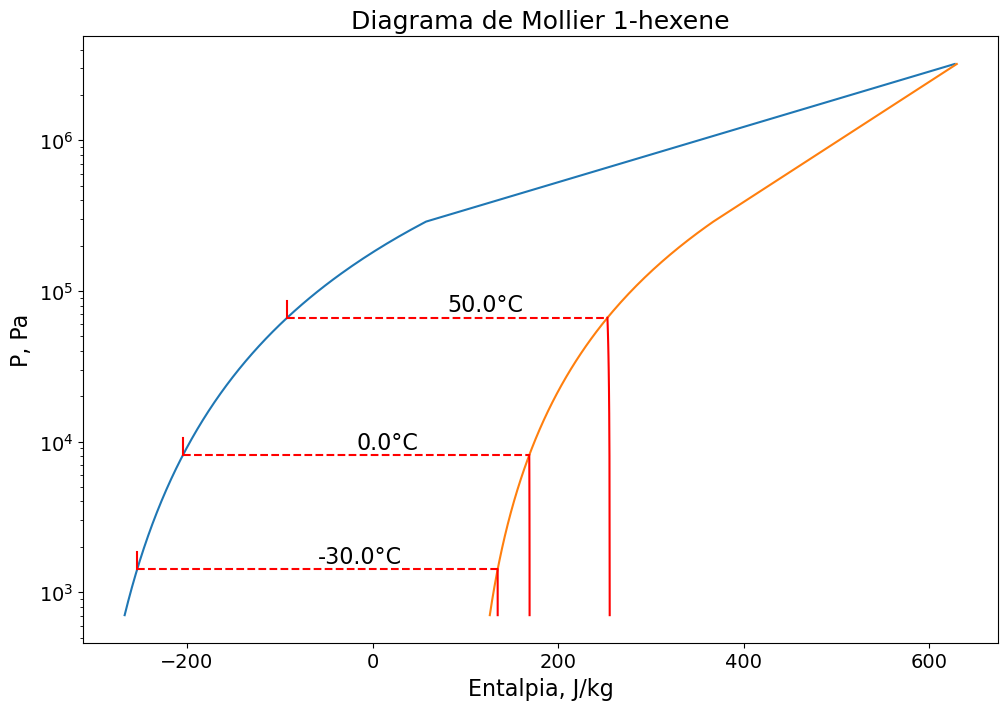

In [58]:
# Entalpía de vaporización.
# Ecuación de Clapeyron y PR
h = 1e-5  # Incremento para la derivada numérica
dPdT = [(PsatPR(T[i]+h, CritPoint)-PsatPR(T[i]-h, CritPoint))/(2*h)
        for i in range(len(T))]
DHv = T*(VVsat-VLsat)*dPdT

Hvs = Hl(T)+DHv

# Isoterma
T_isot = [T+273.15 for T in [-30, 0, 50]]

Psat_isot = np.array([PsatPR(T_isot[i], CritPoint)
                     for i in range(len(T_isot))])
Vsat_isot = [PR(T_isot[i], CritPoint=CritPoint, P=Psat_isot[i])
             for i in range(len(T_isot))]
VVsat_isot = np.array([Vsat_isot[i][0] for i in range(len(T_isot))])
VLsat_isot = np.array([Vsat_isot[i][2] for i in range(len(T_isot))])
dPdT_isot = [(PsatPR(T_isot[i]+h, CritPoint)-PsatPR(T_isot[i] -
              h, CritPoint))/(2*h) for i in range(len(T_isot))]
DHv_isot = T_isot*(VVsat_isot-VLsat_isot)*dPdT_isot
Hv_isot = Hl(T_isot) + DHv_isot

# Representación diag. Mollier
# El tamaño hay que pasarlo a pulgadas
plt.subplots(figsize=(30/2.54, 20/2.54))
plt.semilogy(Hl(T)/M, Psat, Hvs/M, Psat)
plt.semilogy([Hl(T_isot)/M, Hl(T_isot)/M],
             [Psat_isot*1.3, Psat_isot], '-r')
plt.semilogy([Hl(T_isot)/M, Hv_isot/M], [Psat_isot, Psat_isot], '--r')
for i in range(len(T_isot)):
    plt.text((Hl(T_isot[i])+Hv_isot[i])/2/M, Psat_isot[i]
             * 1.1, str(T_isot[i]-273.15)+'°C', fontsize=16)

# Prop. residuales isoterma
Pmin = min(Psat)
P_isot = [np.linspace(Pmin, Psat_isot[i], 10) for i in range(len(T_isot))]
a_isot = [abPR(T_isot[i], CritPoint)[0] for i in range(len(T_isot))]
b_isot = [abPR(T_isot[i], CritPoint)[1] for i in range(len(T_isot))]
alfa_isot = [abPR(T_isot[i], CritPoint)[2] for i in range(len(T_isot))]
m_isot = [abPR(T_isot[i], CritPoint)[3] for i in range(len(T_isot))]

VV_isot = [[PR(T_isot[i], CritPoint, P=P_isot[i][j])[0]
            for j in range(len(P_isot[i]))] for i in range(len(T_isot))]
Z_isot = [P_isot[i]*VV_isot[i]/(R*T_isot[i]) for i in range(len(T_isot))]

HR_isot = [R*T_isot[i]*(Z_isot[i]-1) - a_isot[i]/(b_isot[i]*8**0.5)*(1+m_isot[i]*(T_isot[i]/TC/alfa_isot[i])**0.5)*np.log(
    (Z_isot[i]+(1+2**0.5)*b_isot[i]*P_isot[i]/R/T_isot[i])/(Z_isot[i]+(1-2**0.5)*b_isot[i]*P_isot[i]/R/T_isot[i])) for i in range(len(T_isot))]
for i in range(len(T_isot)):
    # La Hv_sat ya incluye la HR, por tanto al resto hay que sumarle la diferencia de HR con ese valor
    plt.semilogy((Hv_isot[i]+(HR_isot[i]-HR_isot[i][-1]))/M, P_isot[i], '-r')

# GRsat=R*T*(Z-np.log(Z)-1-np.log(1-b/VVsat)-(a/(R*T))*np.log((VVsat+(1+2**0.5)*b)/(VVsat+(1-2**0.5)*b))/(2**1.5*b))
# SRsat_isot=(HRsat-GRsat)/T
plt.xlabel('Entalpia, J/kg', fontsize=16)
plt.ylabel('P, Pa', fontsize=16)
plt.title('Diagrama de Mollier '+sustancia, fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Ficha tecnica

In [59]:
from IPython.display import FileLink, display, IFrame

# Ruta del archivo PDF en el directorio actual
pdf_path = 'ICSC 0490 - 1-HEXENE.pdf'

# Crea un enlace al archivo y lo muestra
display(FileLink(pdf_path))

# Muestra el PDF directamente
display(IFrame(pdf_path, width="100%", height=800))



C:\Users\chris\Termo\ICSC 0490 - 1-HEXENE.pdf

# Bibliografia